# AR-MA

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/04/media/cover.png?raw=1" style="width: 40%; display: block; margin: auto;">

## –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ

1. –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF).
2. –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è  (PACF).
3. –û–±—ä—è—Å–Ω–µ–Ω–∏–µ —Ç–æ–≥–æ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞—é—Ç –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ.

In [3]:
# Imports
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import ccf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.holtwinters import ExponentialSmoothing

np.random.seed(0) # For reproducibility

In [4]:
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
def run_sequence_plot(x, y, title, xlabel="Time", ylabel="Values", ax=None):
    if ax is None:
        _, ax = plt.subplots(1,1, figsize=(10, 3.5))
    ax.plot(x, y, 'k-')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(alpha=0.3)
    return ax

## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö
- –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∏–∑–º–µ—Ä—è–µ—Ç —Å—Ç–µ–ø–µ–Ω—å —Å–≤—è–∑–∏ –º–µ–∂–¥—É –¥–≤—É–º—è —Å–ª—É—á–∞–π–Ω—ã–º–∏ –≤–µ–ª–∏—á–∏–Ω–∞–º–∏.
- –í –¥–∞–Ω–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ –æ–Ω–∞ –∏–∑–º–µ—Ä—è–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –¥–≤—É–º—è —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –º–æ–º–µ–Ω—Ç–∞–º–∏ –≤—Ä–µ–º–µ–Ω–∏.
- –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤–∞–∂–Ω–∞ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.
- –°—É—â–µ—Å—Ç–≤—É–µ—Ç –¥–≤–∞ —Ç–∏–ø–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π:
    - –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è.
    - –í–∑–∞–∏–º–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è.

### –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF)
  - ACF –∏–∑–º–µ—Ä—è–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å –µ–≥–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º–∏ –∑–∞–ø–∞–∑–¥—ã–≤–∞—é—â–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
  
  $$ ACF(k) = \frac{\mathbb{E}[(X(t) - \mu)(X(t-k) - \mu)]}{\sigma^2} $$
  
  - –≥–¥–µ:
    - $k$ –ª–∞–≥ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.
    - $X(t)$ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t$.
    - $\mu$ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –≤—ã—á–∏—Å–ª—è–µ–º–æ–µ –ø–æ –≤—Å–µ–º—É —Ä—è–¥—É.
    - $\sigma^2$ –¥–∏—Å–ø–µ—Ä—Å–∏—è.
  - –ó–Ω–∞—á–µ–Ω–∏—è, –±–ª–∏–∑–∫–∏–µ –∫ $1$ –∏–ª–∏ $-1$, —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è, –±–ª–∏–∑–∫–∏–µ –∫ $0$, —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Å–ª–∞–±—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.

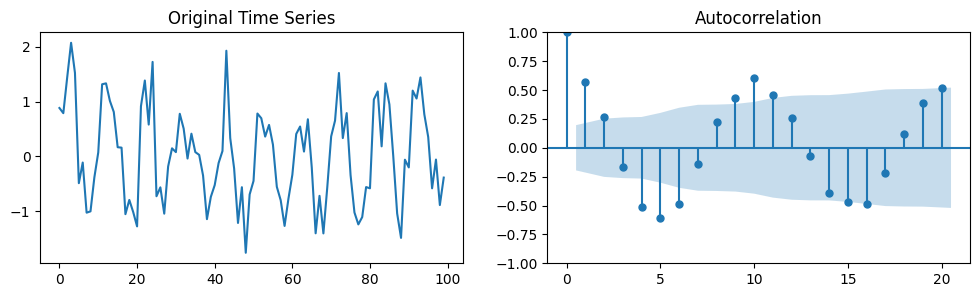

In [6]:
n = 100

time_series_1 = np.random.normal(0, 0.5, n) + np.sin(2*np.pi/10*np.arange(n))
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(time_series_1)
axes[0].set_title('Original Time Series')
# –ü–æ—Å—Ç—Ä–æ–∏–º –ø–µ—Ä–≤—ã–µ 20 –ª–∞–≥–æ–≤. –ú–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –±–æ–ª—å—à–µ, –∏–∑–º–µ–Ω—è—è `lags` –∞—Ä–≥—É–º–µ–Ω—Ç.
plot_acf(time_series_1, lags=20, alpha=0.05, ax=axes[1]); 

- –ù–∞ –ø—Ä–∞–≤–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∞ –∫–æ—Ä—Ä–µ–ª–æ–≥—Ä–∞–º–º–∞ ‚Äì –≥—Ä–∞—Ñ–∏–∫, –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É—é—â–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é. –¢–æ—á–∫–∞–º–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏.
- –°–∏–Ω—è—è –æ–±–ª–∞—Å—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º–∏, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –æ—Å—Ç–∞–ª—å–Ω—ã–µ - –Ω–µ—Ç. –í  –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∑–Ω–∞—á–µ–Ω–∏ $alpha=0.05$  (–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª 95%), –Ω–æ –µ–≥–æ –º–æ–∂–Ω–æ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –Ω–∞ –¥—Ä—É–≥–∏–µ —É—Ä–æ–≤–Ω–∏.
- –í—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Ö–æ—Ä–æ—à–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Å–∞–º–∏–º —Å–æ–±–æ–π, —Å–¥–≤–∏–Ω—É—Ç—ã–º –Ω–∞ 1 ($lag = 1$)
- –ò–º–µ–µ—Ç—Å—è —Ç–∞–∫–∂–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏ $lag = 2$, –Ω–æ –æ–Ω–∞ –Ω–µ —Ç–∞–∫ —Ö–æ—Ä–æ—à–∞, –∫–∞–∫—Ç –ø—Ä–∏ $lag = 1$. –ò —Ç–∞–∫ –¥–∞–ª–µ–µ..
- –°–º–æ—Ç—Ä–∏—Ç–µ [–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html) –¥–ª—è –±–æ–ª—å—à–µ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏..

### –§—É–Ω—Ü–∏—è –≤–∑–∞–∏–º–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏  (CCF)

- CCF –∏–∑–º–µ—Ä—è–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –¥–≤—É–º—è –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Ä—è–¥–∞–º–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ª–∞–≥–∞:

$$CCF(k) = \frac{E[(X(t) - \mu_x)(Y(t-k) - \mu_y)]}{\sigma_x \sigma_y}$$

- –≥–¥–µ:
  - $X$ –∏ $Y$ –¥–≤–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞.
  - $\mu_x, \mu_y$ –∏—Ö —Å—Ä–µ–¥–Ω–∏–µ, –∏ $\sigma_x, \sigma_y$ –∏—Ö —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è.
- CCF –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –±–æ–ª–µ–µ –∫–æ—Ä–æ—Ç–∫–æ–≥–æ, –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –¥–ª–∏–Ω–Ω–æ–º —Å–∏–≥–Ω–∞–ª–µ.

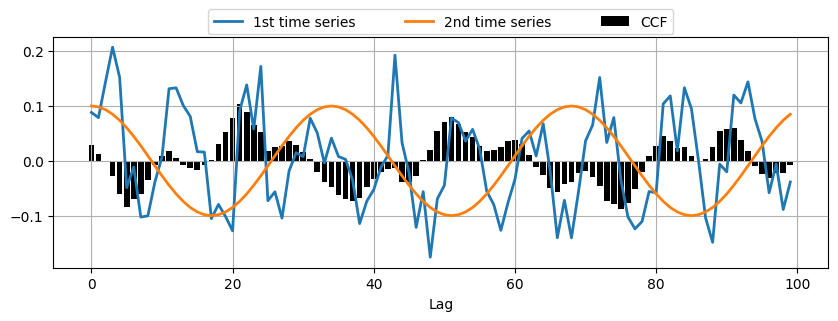

In [7]:
time_series_2 = np.cos(np.pi/17*np.arange(n))

# Calculate CCF between the two time series
ccf_vals = ccf(time_series_1, time_series_2, adjusted=False)

# Plot CCF
_, ax = plt.subplots(1,1,figsize=(10,3))
ax.bar(range(len(ccf_vals)), ccf_vals, color='k', label='CCF')
ax.plot(time_series_1*0.1, linewidth=2, label='1st time series')
ax.plot(time_series_2*0.1, linewidth=2, label='2nd time series')
plt.xlabel('Lag')
plt.legend(bbox_to_anchor=(0.2, 1.01, .6, 1.5), loc='lower center', ncol=3, mode="expand", borderaxespad=0.)
plt.grid();

### –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π
  - –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –æ–Ω–∏ —Å–ª—É—á–∞–π–Ω—ã–º–∏, –∏–º–µ—é—Ç —Ç—Ä–µ–Ω–¥ –∏–ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å).
  - –ü–æ–º–æ—â—å –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ—Ä—è–¥–∫–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π ARIMA (–ø–æ–¥—Ä–æ–±–Ω–µ–µ –æ–± —ç—Ç–æ–º –ø–æ–∑–∂–µ).
  - –í—ã—è–≤–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö.

### –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∏ —Å–æ–æ–±—Ä–∞–∂–µ–Ω–∏—è
1. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑–º–µ—Ä—è—é—Ç —Ç–æ–ª—å–∫–æ "–ª–∏–Ω–µ–π–Ω—ã–µ" —Å–≤—è–∑–∏.
2. –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–Ω–∞—á–∏–º—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å "—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏".
3. –í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–µ –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç "–ø—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ–π —Å–≤—è–∑–∏" –∏ –∏–Ω–æ–≥–¥–∞ –º–æ–∂–µ—Ç –≤–≤–æ–¥–∏—Ç—å –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ.
     
<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/04/media/timoelliot.png?raw=1" style="width: 25%; display: block; margin: auto;">

<div style="text-align: center; font-size: 15px;">Image: <a href="https://timoelliott.com/">timoelliot</a></div>

4. ACF –∏–∑–º–µ—Ä—è–µ—Ç –∫–∞–∫ –ø—Ä—è–º—ã–µ, —Ç–∞–∫ –∏ *–∫–æ—Å–≤–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏* –º–µ–∂–¥—É –ª–∞–≥–∞–º–∏.

- –°–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö –ª–∞–≥–∞—Ö –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø—Ä–∏ –±–æ–ª–µ–µ –∫–æ—Ä–æ—Ç–∫–∏—Ö –ª–∞–≥–∞—Ö.

- –†–∞—Å—Å–º–æ—Ç—Ä–∏–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–ª—É—á–∞–π–Ω–æ–µ –±–ª—É–∂–¥–∞–Ω–∏–µ:

$$X(t)=X(t-1)+\epsilon_t$$

- –í—ã –º–æ–∂–µ—Ç–µ –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ —Ç–æ–ª—å–∫–æ –ª–∞–≥ $h=1$ –≤–∞–∂–µ–Ω, –æ–¥–Ω–∞–∫–æ...

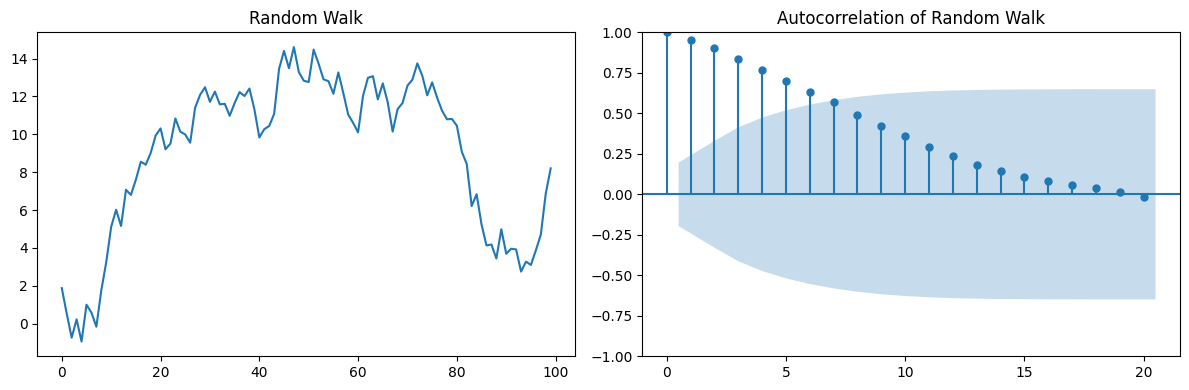

In [8]:
random_walk = np.cumsum(np.random.normal(0, 1, 100))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(random_walk)
axes[0].set_title('Random Walk')
plot_acf(random_walk, lags=20, alpha=0.05, ax=axes[1])
axes[1].set_title('Autocorrelation of Random Walk')
plt.tight_layout()

- –í—ã –º–æ–∂–µ—Ç–µ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –ª–∞–≥–∏ $h>1$ —Ç–∞–∫–∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ ACF.
- –≠—Ç–æ –∫–æ—Å–≤–µ–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏–∑-–∑–∞ –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏ –ª–∞–≥–µ $h=1$.

### –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è  (PACF)
- PACF —É—Å—Ç—Ä–∞–Ω—è–µ—Ç 4-–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ ACF, –≤—ã–¥–µ–ª—è—è –ø—Ä—è–º—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –≤—Ä–µ–º–µ–Ω–Ω—ã–º —Ä—è–¥–æ–º –∏ –µ–≥–æ –≤–µ—Ä—Å–∏–µ–π —Å –∑–∞–ø–∞–∑–¥—ã–≤–∞–Ω–∏–µ–º.
- –≠—Ç–æ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –∑–∞ —Å—á–µ—Ç —É—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –≤–ª–∏—è–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø—Ä–∏ –±–æ–ª–µ–µ –∫–æ—Ä–æ—Ç–∫–∏—Ö –∑–∞–ø–∞–∑–¥—ã–≤–∞–Ω–∏—è—Ö.
- –í—ã—Å–æ–∫–∏–π PACF –ø—Ä–∏ –ª–∞–≥–µ $k$ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é —á–∞—Å—Ç–∏—á–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å $k$-–º –ª–∞–≥–æ–º, –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ–º—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è–º–∏ –ø—Ä–∏ –º–µ–Ω—å—à–∏—Ö –ª–∞–≥–∞—Ö..


- PACF —Å –ª–∞–≥–æ–º $k$ –∏–Ω–æ–≥–¥–∞ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è –∫–∞–∫ $\phi_{kk}$:

$$\phi_{kk} = \text{Corr}\big(X(t) - \hat{X}(t), X(t-k) - \hat{X}(t-k)\big)$$

- –≥–¥–µ:
    - $\hat{X}(t)$ - –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ $X(t)$ –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–µ –Ω–∞ –≤—Å–µ—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –¥–æ $t-1$.
    - $\hat{X}(t-k)$ - –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ $X(t-k)$ –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–µ –Ω–∞ –≤—Å–µ—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –¥–æ $t-k-1$.

- –°–æ–≤–º–µ—Å—Ç–Ω–æ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ ACF –∏ PACF –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –±–æ–ª–µ–µ –ø–æ–ª–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.
- ACF –ø–æ–º–æ–≥–∞–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –æ–±—â—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.
- PACF –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ª–∞–≥–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ–∫–∞–∑—ã–≤–∞—é—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.

**–ü—Ä–∏–º–µ—Ä**

- –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, –≥–¥–µ ACF –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –Ω–∞ –ª–∞–≥–∞—Ö 1, 2 –∏ 3.
- –ë–µ–∑ PACF –Ω–µ—è—Å–Ω–æ, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –ª–∞–≥–µ 3 –ø—Ä—è–º–æ–π –∏–ª–∏ –ø—Ä–æ—Å—Ç–æ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ–º —Å–∏–ª—å–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –Ω–∞ –ª–∞–≥–∞—Ö 1 –∏ 2.
- PACF –º–æ–∂–µ—Ç –ø—Ä–æ—è—Å–Ω–∏—Ç—å —ç—Ç–æ, –ø–æ–∫–∞–∑–∞–≤, –µ—Å—Ç—å –ª–∏ –∑–Ω–∞—á–∏–º–∞—è –ø—Ä—è–º–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –ª–∞–≥–µ 3.

In [9]:
n = 100

time_series = np.zeros(n)
# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–ª—è –∏–Ω–¥—É—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏ –ª–∞–≥–∞—Ö 1, 2 –∏ 3
alpha1, alpha2, alpha3 = 0.6, -0.3, 0.2 
noise = np.random.normal(0, 1, n)

# Generate correlated data
for t in range(3, n):
    time_series[t] = alpha1 * time_series[t-1] + alpha2 * time_series[t-2] + alpha3 * time_series[t-3] + noise[t]

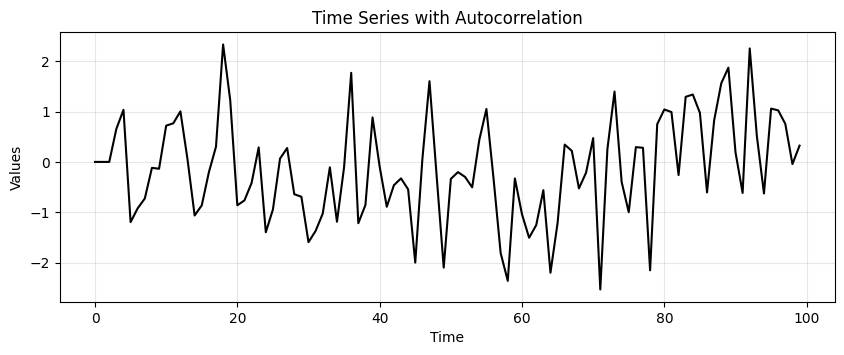

In [10]:
run_sequence_plot(np.arange(100), time_series, title='Time Series with Autocorrelation');

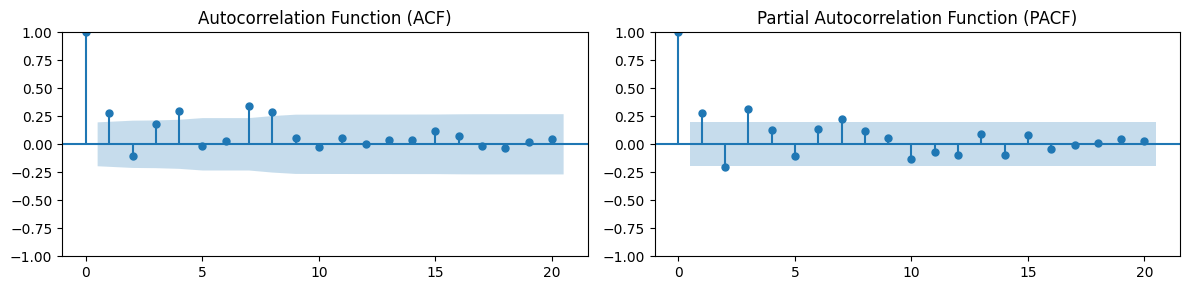

In [11]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

# Plot ACF
plot_acf(time_series, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(time_series, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()


- –û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ª–∞–≥–∞ —Å –ø–æ–º–æ—â—å—é ACF –∏ PACF –ø–æ–ª–µ–∑–Ω–∞ –ø—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –¥–∞–ª–µ–µ.


azot : pacf –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –±–ª—É–∂–¥–∞–Ω–∏—è

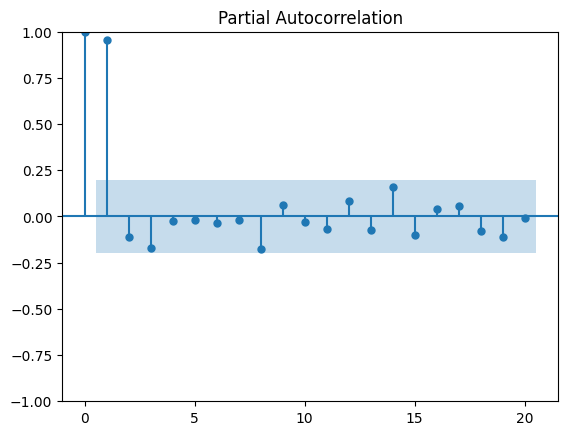

In [12]:
plot_pacf(random_walk, lags=20, alpha=0.05)
plt.show()

## –ú–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR)

  - –ú–æ–¥–µ–ª—å –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR model) —ç—Ç–æ —Ç–∏–ø –º–æ–¥–µ–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —à–∞–≥–æ–≤ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –≠—Ç–∞ –º–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑–µ—Ç—Å—è –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –≤—Ä–µ–º–µ–Ω–Ω–æ–º —à–∞–≥–µ.
  - AR-–º–æ–¥–µ–ª—å –∑–∞–≤–∏—Å–∏—Ç —Ç–æ–ª—å–∫–æ –æ—Ç —Å–≤–æ–∏—Ö —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—à–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
  

- –û–±—â–∞—è —Ñ–æ—Ä–º–∞ AR-–º–æ–¥–µ–ª–∏ –ø–æ—Ä—è–¥–∫–∞ $p$ –∏–º–µ–µ—Ç –≤–∏–¥:

$$X(t) = c + \phi_1 X(t-1) + \phi_2 X(t-2) + \dots + \phi_p X(t-p) + \epsilon_t$$

- –≥–¥–µ
    - $X(t)$: –∑–Ω–∞—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t$.
    - $c$: –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞ (—Ç–∞–∫ –Ω–∞–∑—ã–≤–µ–º—ã–π "—Å–≤–æ–±–æ–¥–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç").
    - $\phi_1, \phi_2, \dots, \phi_p$: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏.
    - $p$: –ø–æ—Ä—è–¥–æ–∫ AR-–º–æ–¥–µ–ª–∏ (—á–∏—Å–ª–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ª–∞–≥–æ–≤).
    - $\epsilon_t$: –æ—à–∏–±–∫–∞ (–±–µ–ª—ã–π —à—É–º) –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t$.

**–ú–æ–¥–µ–ª—å AR(1)**
- –ú–æ–¥–µ–ª—å –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏, AR(1), –∏–º–µ–µ—Ç –≤–∏–¥:

$$X(t) = c + \phi_1 X(t-1) + \epsilon_t$$

- –í –º–æ–¥–µ–ª–∏ AR(1) —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –ø—Ä–µ–¥—à–µ—Å—Ç–≤—É—é—â–µ–º –µ–º—É –∑–Ω–∞—á–µ–Ω–∏–∏.

- –ü—Ä–∏–º–µ—Ä: –ø—Ä–æ—Å—Ç–∞—è –º–æ–¥–µ–ª—å —Ü–µ–Ω—ã –∞–∫—Ü–∏–∏, –≤ –∫–æ—Ç–æ—Ä–æ–π —Å–µ–≥–æ–¥–Ω—è—à–Ω—è—è —Ü–µ–Ω–∞ —á–∞—Å—Ç–∏—á–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ü–µ–Ω—ã –≤—á–µ—Ä–∞—à–Ω–µ–≥–æ –¥–Ω—è.

**–ê–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞**
- –ê–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ (AR(2), AR(3) –∏ —Ç. –¥.) –∑–∞–≤–∏—Å—è—Ç –æ—Ç –±–æ–ª–µ–µ —á–µ–º –æ–¥–Ω–æ–≥–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.
- –ù–∞–ø—Ä–∏–º–µ—Ä, –º–æ–¥–µ–ª—å AR(2) –∏–º–µ–µ—Ç –≤–∏–¥:
  :

$$X(t) = c + \phi_1 X(t-1) + \phi_2 X(t-2) + \epsilon$$
- –≠—Ç–∏ –º–æ–¥–µ–ª–∏ –ø–æ–ª–µ–∑–Ω—ã –≤ —Å–∏—Ç—É–∞—Ü–∏—è—Ö, –∫–æ–≥–¥–∞ –≤–ª–∏—è–Ω–∏–µ –±–æ–ª–µ–µ —á–µ–º –æ–¥–Ω–æ–≥–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —à–∞–≥–∞ —è–≤–ª—è–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º.t.

**–û—Ü–µ–Ω–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏ AR**
- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–µ–π AR –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Å –ø–æ–º–æ—â—å—é —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ –æ—Ü–µ–Ω–∫–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –∏–ª–∏ –º–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤.
- –û—Ü–µ–Ω–µ–Ω–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–∑–≤–æ–ª—è—é—Ç –ø–æ–Ω—è—Ç—å, –∫–∞–∫–æ–µ –≤–ª–∏—è–Ω–∏–µ –æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–æ—à–ª—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥—É.
- –î—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –º–æ–¥–µ–ª–∏ AR *–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã*.

**–û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π AR**
- –î–ª—è –º–æ–¥–µ–ª–µ–π AR —Ç—Ä–µ–±—É–µ—Ç—Å—è, —á—Ç–æ–±—ã –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –±—ã–ª *—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º*.
- –ú–æ–¥–µ–ª–∏ AR –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –º–æ–≥—É—Ç *–ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è* –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –æ–±—É—á–µ–Ω–∏—è –∏ –ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–∏.
- –û–Ω–∏ –Ω–µ –º–æ–≥—É—Ç –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö.

- –ü–æ —Å–≤–æ–µ–π –ø—Ä–∏—Ä–æ–¥–µ –º–æ–¥–µ–ª–∏ AR –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç *–≤–Ω–µ—à–Ω–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã*.
- –û–±—ã—á–Ω–æ —ç—Ç–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è.
- –ù–∞–ø—Ä–∏–º–µ—Ä, –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –ø—Ä–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–∏ –Ω–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏—é.
- –°—É—â–µ—Å—Ç–≤—É—é—Ç —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è (ARMAX), –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∑–≤–æ–ª—è—é—Ç –≤–∫–ª—é—á–∞—Ç—å –≤ –º–æ–¥–µ–ª—å –≤–Ω–µ—à–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ.



### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä—è–¥–∫–∞ –º–æ–¥–µ–ª–∏ AR
- –ö–∞–∫ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ $p$ –¥–ª—è –º–æ–¥–µ–ª–∏ AR?
- –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –ø–æ—Å–º–æ—Ç—Ä–µ–≤ –Ω–∞ –ø–µ—Ä–≤—ã–µ –ª–∞–≥–∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ (PACF)
- –î–∞–≤–∞–π—Ç–µ —Ä–∞—Å—Å–º–æ—Ä—Ç–∏–º —ç—Ç–æ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ..

- –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é AR(2) —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ `[1.0, -0.5, 0.7]`.
- –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ `1.0` –≤ –Ω–∞—á–∞–ª–µ ACF –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –Ω—É–ª–µ–≤–æ–º—É –ª–∞–≥—É –∏ –≤—Å–µ–≥–¥–∞ —Ä–∞–≤–Ω–æ `1.0`.

In [13]:
ar_data = arma_generate_sample(ar=np.array([1.0, -0.5, 0.7]), ma=np.array([1]), nsample=200, scale=1, burnin=1000)

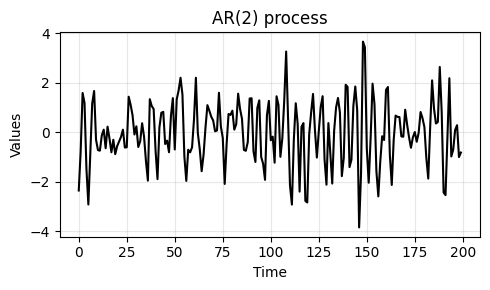

In [14]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
run_sequence_plot(np.arange(200), ar_data, ax=ax, title="AR(2) process")
plt.tight_layout()

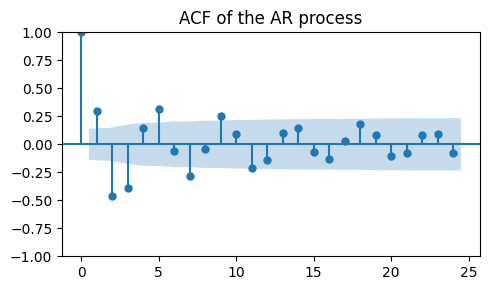

In [15]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_acf(ar_data, ax=ax, title="ACF of the AR process")
plt.tight_layout();

- –ó–∞—Ç–µ–º –≤—ã—á–∏—Å–ª–∏–º PACF –¥–ª—è `ar_data`.

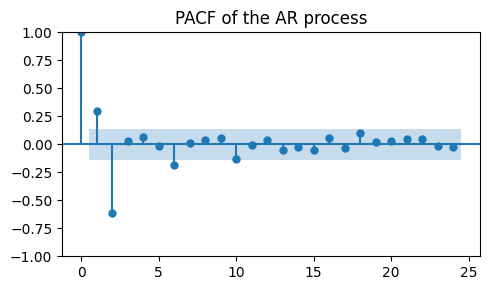

In [16]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))

plot_pacf(ar_data, ax=ax, title="PACF of the AR process")
plt.tight_layout();

- –ü–æ–º–∏–º–æ –ø–∏–∫–∞ –ø—Ä–∏ –ª–∞–≥–µ $0$, –∫–æ—Ç–æ—Ä—ã–π –≤—Å–µ–≥–¥–∞ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç, –º—ã –≤–∏–¥–∏–º –¥–≤–∞ –∑–Ω–∞—á–∏–º—ã—Ö –ø–∏–∫–∞:
- –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –ø–∏–∫ –ø—Ä–∏ –ª–∞–≥–µ $1$, –≤—ã–∑–≤–∞–Ω–Ω—ã–π –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $-0.5$.
- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –ø–∏–∫ –ø—Ä–∏ –ª–∞–≥–µ $2$, –≤—ã–∑–≤–∞–Ω–Ω—ã–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $0.7$.

- –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø—Ä–æ—Ü–µ—Å—Å –∏–º–µ–µ—Ç "–ø–∞–º—è—Ç—å" –¥–ª–∏–Ω–æ–π 2.
- –î—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, (–±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å) –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –¥–≤—É–º—è –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —à–∞–≥–∞–º–∏.
- –ï—Å–ª–∏ –º—ã —Ö–æ—Ç–∏–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –º–æ–¥–µ–ª—å AR –¥–ª—è –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –º—ã –≤—ã–±–µ—Ä–µ–º $p=2$, —Ç–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å AR(2).
- –ù–∞–∫–æ–Ω–µ—Ü, –ø—Ä–æ—Ü–µ—Å—Å AR —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç—Å—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–µ–¥–ª–µ–Ω–Ω–æ —É–±—ã–≤–∞—é—Ç —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º.
- –≠—Ç–æ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å  –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ (ACF), –≥–¥–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–µ –ø–∏–∫–∏ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –º–Ω–æ–≥–∏—Ö –ª–∞–≥–æ–≤.


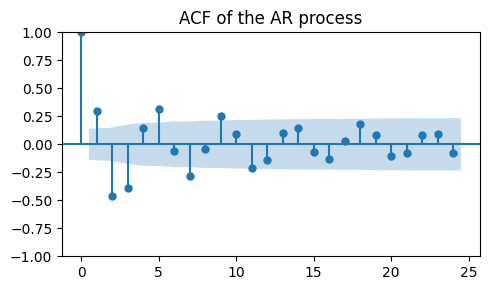

In [17]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_acf(ar_data, ax=ax, title="ACF of the AR process")
plt.tight_layout()

**‚öô –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ**

- –ü–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å –∏–∑–º–µ–Ω–µ–Ω–∏–µ–º, –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –∏–ª–∏ —É–¥–∞–ª–µ–Ω–∏–µ–º –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ `ar` –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `arma_generate_sample`.
- –ó–∞—Ç–µ–º –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏—Ç—Å—è –≥—Ä–∞—Ñ–∏–∫ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ (PACF).

In [18]:
def ar_sample_show(ar):
    ar_data = arma_generate_sample(ar=ar,ma=[1],nsample=200,scale=1, burnin=1000)

    run_sequence_plot(np.arange(200),ar_data,'AR data')
    
    _, ax = plt.subplots(1, 2, figsize=(12, 3))

    # Plot ACF
    plot_acf(ar_data, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Plot PACF
    plot_pacf(ar_data, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')
    plt.tight_layout()

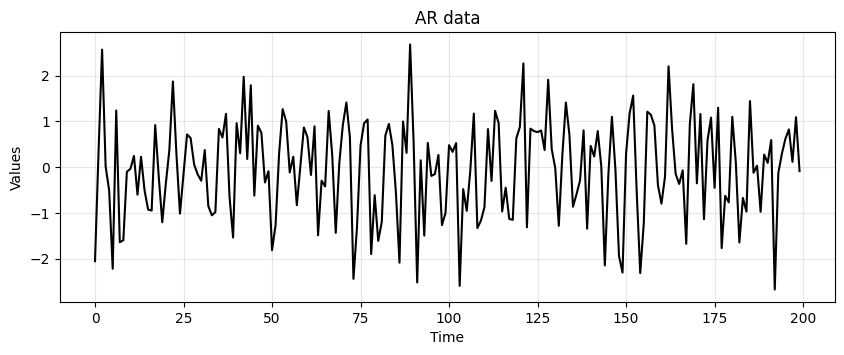

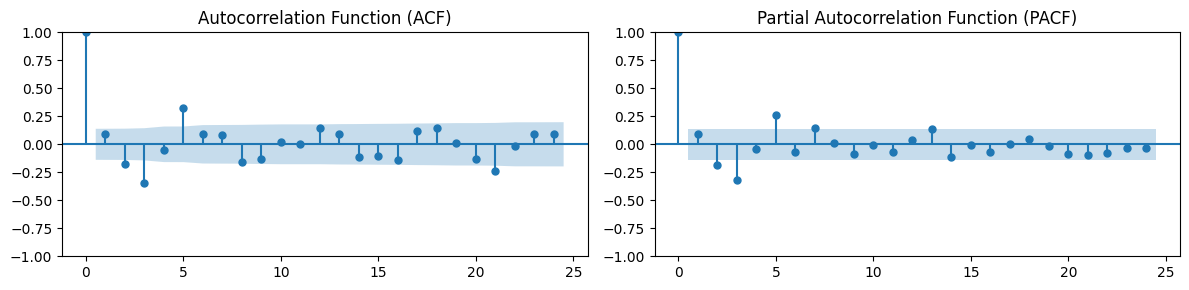

In [19]:
# PACF –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–Ω—É–ª–µ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ AR
ar_sample_show([1,0,0,0.3,0,-0.2])

### –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π AR
- –ö–∞–∫ –≤—ã—á–∏—Å–ª—è—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ AR?
- –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ –Ω–∞—à –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –∏–º–µ–µ—Ç —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.
- –û–¥–Ω–∞–∫–æ –º–æ–¥–µ–ª—å AR –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è *—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö*.
- –ü–æ—ç—Ç–æ–º—É –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:

#### –®–∞–≥ 1 –£–¥–∞–ª–µ–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

- –ü–µ—Ä–µ–¥ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ AR –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.
- –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∏ –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–∞–¥–∞–Ω–∏—è—Ö.
- –ï—Å—Ç—å –¥–≤–∞ –≤–æ–∑–º–æ–∂–Ω—ã—Ö —Å–ø–æ—Å–æ–±–∞:
  1. –ü—Ä–∏–º–µ–Ω–∏—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –∏ —Å–µ–∑–æ–Ω–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ–∫ –≤—Ä–µ–º–µ–Ω–Ω–æ–º—É —Ä—è–¥—É:
     $$
     R'(t) = X(t + 1) - X(t) \qquad \text{removes trend} 
     $$
     $$
     R(t) = R'(t + 1) - R'(t)  \qquad \text{removes seasonality}
     $$ 
  2. –û—Ü–µ–Ω–∏—Ç—å —Ç—Ä–µ–Ω–¥ $T$ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å $S$ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å –ø–æ–º–æ—â—å—é —Å–µ–∑–æ–Ω–Ω–æ–π –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∏–ª–∏ –º–µ—Ç–æ–¥–æ–≤ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è) –∏ –≤—ã—á–µ—Å—Ç—å –∏—Ö:
        $$R(t) = X(t) - T(t) - S(t)$$

#### –®–∞–≥ 2: –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ AR –º–æ–¥–µ–ª–∏

- –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ AR –º–æ–¥–µ–ª–∏.
- –û–±—É—á–∏—Ç–µ AR –º–æ–¥–µ–ª—å –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ $R(t)$, –≤ –∫–æ—Ç–æ—Ä–æ–º –∏—Å–∫–ª—É—á–µ–Ω—ã —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π $\hat R(t+\tau), \tau=1, \dots, H$ –≥–¥–µ $H$ –≥–æ—Ä–∏–∑–æ–Ω—Ç –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è.

#### –®–∞–≥ 3: –†–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞

- –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ç–æ–≥–æ –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã —Å–¥–µ–ª–∞–ª–∏ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º –Ω–∞ —à–∞–≥–µ 1.
- –ï—Å–ª–∏ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ:
    - –ú—ã –¥–æ–ª–∂–Ω—ã –æ—Ç–º–µ–Ω–∏—Ç—å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ, –≤–∑—è–≤ –∫—É–º—É–ª—è—Ç–∏–≤–Ω—ã–µ —Å—É–º–º—ã –æ—Å—Ç–∞—Ç–∫–æ–≤.
- –ï—Å–ª–∏ –º—ã —É–¥–∞–ª—è–ª–∏ —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, —Ç–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ $\tau \in [1, H]$:
    - –ü—Ä–µ–¥—Å–∫–∞–∂–∏—Ç–µ  —Ç—Ä–µ–Ω–¥ $\hat{T}(t+\tau)$ –∏ —Å–µ–∑–æ–Ω–Ω—É—é —Å–æ—Å—Ç–∞–≤–ª—è—é—â—É—é $\hat{S}(t+\tau)$.
    - –ò –¥–æ–±–∞–≤—å—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∫ —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é:

    $$\hat X(t+\tau) = \hat R(t+\tau) + \hat{T}(t+\tau) + \hat{S}(t+\tau)$$


### –ü—Ä–∏–º–µ—Ä: –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º AR –º–æ–¥–µ–ª–∏

- –î–∞–≤–∞–π—Ç–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, –∏–º–µ—é—â–∏–µ —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.

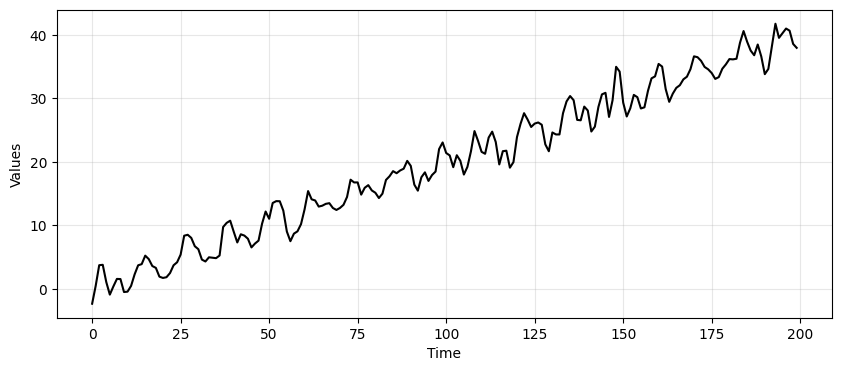

In [20]:
time = np.arange(200)
trend = time * 0.2
seasonality = 2*np.sin(2*np.pi*time/12) # Seasonality 12
time_series_ar = trend + seasonality + ar_data

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time, time_series_ar, "", ax=ax);

- –ü–æ—Å–∫–æ–ª—å–∫—É –º—ã —Å–æ–±–∏—Ä–∞–µ–º—Å—è –≤—ã—á–∏—Å–ª—è—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã, –¥–∞–≤–∞–π—Ç–µ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã.

In [21]:
train_data_ar = time_series_ar[:164]
test_data_ar = time_series_ar[164:]

- –ß—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø–æ—Ä—è–¥–æ–∫ $p$ AR-–º–æ–¥–µ–ª–∏, –Ω–∞–º –Ω—É–∂–Ω–æ –≤–∑–≥–ª—è–Ω—É—Ç—å –Ω–∞ PACF.
- –ü–æ—Ä—è–¥–æ–∫ $p$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à–µ–º—É –Ω–µ–Ω—É–ª–µ–≤–æ–º—É –∑–Ω–∞—á–∏–º–æ–º—É –ª–∞–≥—É –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ PACF.

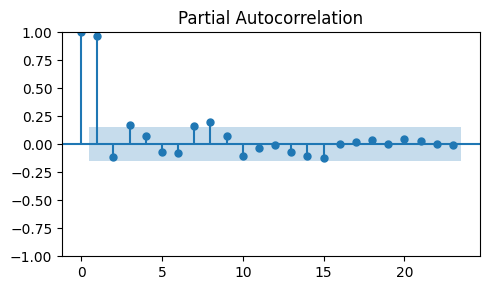

In [22]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_pacf(train_data_ar, ax=ax)
plt.tight_layout();

- –ò—Å—Ö–æ–¥—è –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ PACF –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å –ø–æ—Ä—è–¥–æ–∫ $p=1$.
- –û–¥–Ω–∞–∫–æ, —ç—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ PACF *–Ω–µ –∏–º–µ–µ—Ç –æ—Å–æ–±–æ–≥–æ —Å–º—ã–ª–∞*.
- –ö–∞–∫ –º—ã —É–∂–µ –æ–±—Å—É–∂–¥–∞–ª–∏ —Ä–∞–Ω–µ–µ, –æ–±–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ ACF –∏ PACF —Å–ª–µ–¥—É–µ—Ç –≤—ã—á–∏—Å–ª—è—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ï—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –±—ã—Å—Ç—Ä–æ —Å–Ω–∏–∂–∞—é—Ç—Å—è.
- –ï—Å–ª–∏ –±—ã—Å—Ç—Ä–æ–≥–æ —Å–Ω–∏–∂–µ–Ω–∏—è –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, —ç—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ —á—Ç–æ –í–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏.

- –ü–æ—Å–∫–æ–ª—å–∫—É –º—ã –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –≤—Ä—É—á–Ω—É—é –º—ã –∑–Ω–∞–µ–º, —á—Ç–æ –æ–Ω –∏–º–µ–µ—Ç —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.
- –û–¥–Ω–∞–∫–æ, –¥–ª—è –±–æ–ª—å—à–µ–π —Å—Ç—Ä–æ–≥–æ—Å—Ç–∏ –º—ã –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å –ø–æ–º–æ—â—å—é —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω–æ–≥–æ —Ç–µ—Å—Ç–∞ –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ (ADF-test).

In [23]:
_ , pvalue, _, _, _, _ = adfuller(train_data_ar)
print(f"p-value: {pvalue:.3f}")

p-value: 0.833


- –¢–∞–∫–æ–µ –≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞–º  *–Ω–µ —É–¥–∞–ª–æ—Å—å* –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.

 $$H_0: \text{–¥–∞–Ω–Ω—ã–µ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã}$$

- –ó–¥–µ—Å—å –Ω–∏–∫–∞–∫–∏—Ö —Å—é—Ä–ø—Ä–∏–∑–æ–≤ –Ω–µ—Ç.

- –ß—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏, –º—ã –º–æ–∂–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ, –ø—Ä–∏–º–µ–Ω–∏–≤ –æ–¥–∏–Ω –∏–∑ –º–µ—Ç–æ–¥–æ–≤, –æ–±—Å—É–∂–¥–∞–µ–º—ã—Ö –≤ [—à–∞–≥–µ 1](#–®–∞–≥-1-–£–¥–∞–ª–µ–Ω–∏–µ-—Ç—Ä–µ–Ω–¥–∞-–∏-—Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏).
- –î–∞–≤–∞–π—Ç–µ —Å–Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ.

#### –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ

- –ú—ã –Ω–∞—á–Ω–µ–º —Å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è 1-–≥–æ –ø–æ—Ä—è–¥–∫–∞ —á—Ç–æ–±—ã —É–¥–∞–ª–∏—Ç—å —Ç—Ä–µ–Ω–¥.
- –ó–∞—Ç–µ–º –º—ã –ø—Ä–æ–≤–µ—Ä–∏–º —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é ADF —Ç–µ—Å—Ç–∞.

In [24]:
diff_ar = train_data_ar[1:] - train_data_ar[:-1]

_, pvalue, _, _, _, _ = adfuller(diff_ar)
print(f"p-value: {pvalue:.3f}")

p-value: 0.000


- ADF —Ç–µ—Å—Ç –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ —Ç–µ–ø–µ—Ä—å –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
- –ú—ã –º–æ–≥–ª–∏ –±—ã —Ç–∞–∫ –∂–µ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ 2-–≥–æ –ø–æ—Ä—è–¥–∫–∞, —á—Ç–æ–±—ã –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–µ–π.
- –û–¥–Ω–∞–∫–æ, —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç–æ–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ—Å—Ç–µ–π –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–∞—Ä—É—à–µ–Ω–∏—é —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö.
- –≠—Ç–∞ –ø—Ä–æ–±–ª–µ–º–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è  *—á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ*.
- –°–º. [—ç—Ç–æ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ](https://people.duke.edu/~rnau/411arim2.htm) –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.

- –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –±—É–¥—É—Ç –≤—ã–≥–ª—è–¥–µ—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞.

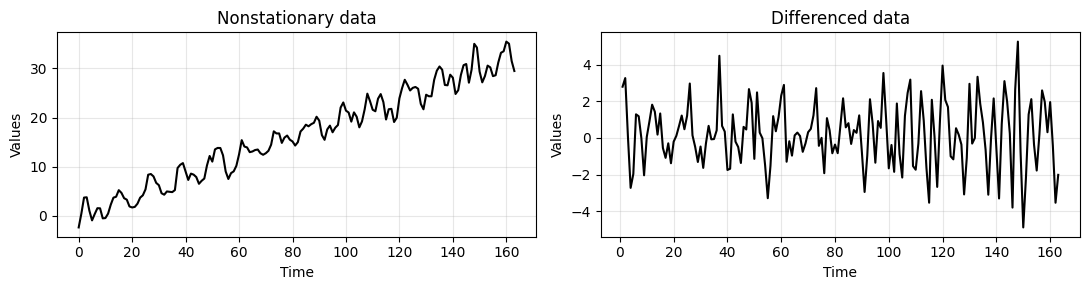

In [25]:
_, axes = plt.subplots(1,2, figsize=(11,3))
run_sequence_plot(time[:len(train_data_ar)], train_data_ar, title="Nonstationary data", ax=axes[0])
run_sequence_plot(time[1:len(train_data_ar)], diff_ar, title="Differenced data", ax=axes[1])
plt.tight_layout();

- –î–∞–≤–∞–π—Ç–µ –ø–µ—Ä–µ—Å—á–∏—Ç–∞–µ–º PACF –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–∞–∑–Ω–æ—Å—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã–∑.
- –ú—ã —Ç–∞–∫–∂–µ —Å—Ä–∞–≤–Ω–∏–º –µ–≥–æ PACF, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö `ar_data` –Ω –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö `train_data_ar`.

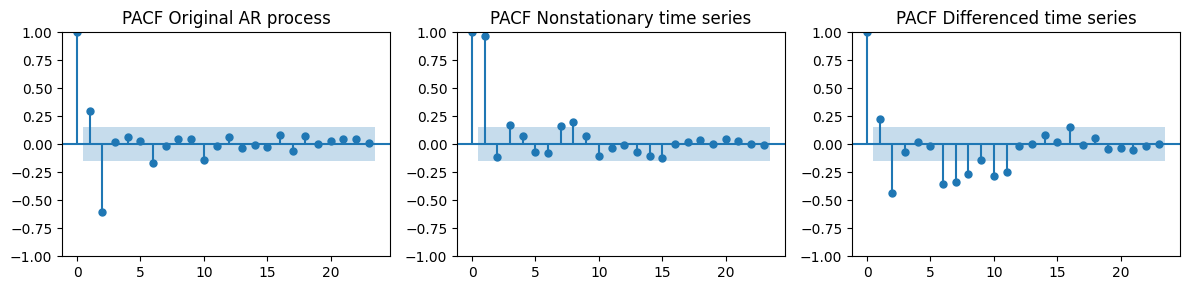

In [26]:
_, axes = plt.subplots(1, 3, figsize=(12, 3))
plot_pacf(ar_data[:len(train_data_ar)], ax=axes[0], title="PACF Original AR process")
plot_pacf(train_data_ar, ax=axes[1], title="PACF Nonstationary time series")
plot_pacf(diff_ar, ax=axes[2], title="PACF Differenced time series")
plt.tight_layout();

- –ó–∞–º–µ—Ç–Ω—ã–π –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –≤—Å–ø–ª–µ—Å–∫ –ø—Ä–∏ –ª–∞–≥–µ 2 –ø—Ä–æ—è–≤–ª—è–µ—Ç—Å—è –∫–∞–∫ –≤ PACF –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö AR, —Ç–∞–∫ –∏ –≤ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö.
- –≠—Ç–∏ –¥–≤–∞ –≥—Ä–∞—Ñ–∏–∫–∞  –≤—ã–≥–ª—è–¥—è—Ç –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏–º–∏, —á–µ–º PACF, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø–æ–ª—É—á–∏–ª–∏ –¥–ª—è –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ó–∞–º–µ—Ç–Ω—ã–π –≤—Å–ø–ª–µ—Å–∫ –ø—Ä–∏ –ª–∞–≥–µ 2 –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç, —á—Ç–æ $p=2$, —Ç.–µ. –º—ã –¥–æ–ª–∂–Ω—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å AR(2).

**‚ö† –í–Ω–∏–º–∞–Ω–∏–µ**

- –í –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞—Ö —Ç–∞–∫–∂–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –¥—Ä—É–≥–∏–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—Å–ø–ª–µ—Å–∫–∏ —Å –±–æ–ª—å—à–∏–º–∏ –ª–∞–≥–∞–º–∏, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö AR.
- –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞–ª–∞—Å—å —Å–µ–∑–æ–Ω–Ω–∞—è —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∞—è.
- –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å–º–æ–∂–µ–º –ª–∏ –º—ã —É—Å—Ç—Ä–∞–Ω–∏—Ç—å –∏—Ö, –ø—Ä–∏–º–µ–Ω–∏–≤ —Å–µ–∑–æ–Ω–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ , –∏ –ø–µ—Ä–µ—Å—á–∏—Ç–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ PACF.

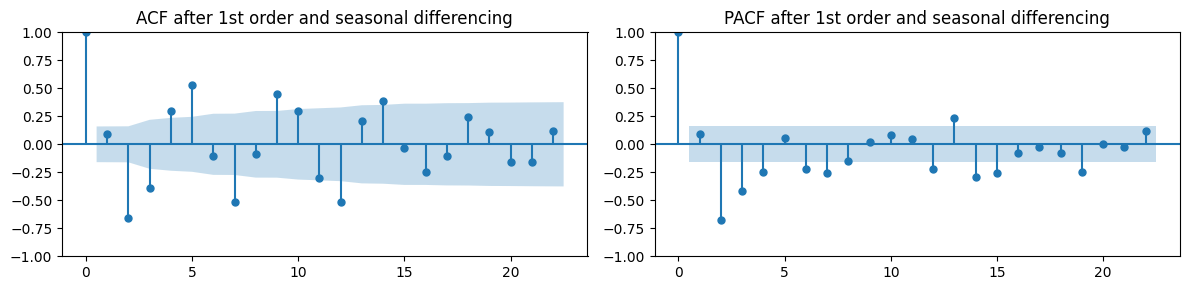

In [27]:
# Seasonal differencing
diff_diff_ar = diff_ar[12:] - diff_ar[:-12]

_, ax = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(diff_diff_ar, ax=ax[0], title="ACF after 1st order and seasonal differencing")
plot_pacf(diff_diff_ar, ax=ax[1], title="PACF after 1st order and seasonal differencing")
plt.tight_layout();

- –î–∞–∂–µ –ø–æ—Å–ª–µ —É—á–µ—Ç–∞ —Å–µ–∑–æ–Ω–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º—ã –Ω–µ –º–æ–∂–µ–º –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å PACF –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ù–∞–ø—Ä–æ—Ç–∏–≤, —ç—Ç–æ—Ç PACF –≤—ã–≥–ª—è–¥–∏—Ç –µ—â–µ –±–æ–ª–µ–µ –æ—Ç–ª–∏—á–Ω—ã–º –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ.
- –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —Ä–µ–¥–∫–æ —É–¥–∞–µ—Ç—Å—è –ø–æ–ª—É—á–∏—Ç—å "—á–∏—Å—Ç—ã–π" PACF —Å –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –∑–∞–º–µ—Ç–Ω—ã–º –æ—Ç—Å—Ç–∞–≤–∞–Ω–∏–µ–º –≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.
- –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ PACF (–∏ ACF) –¥–ª—è –≤—ã–±–æ—Ä–∞ –ø–æ—Ä—è–¥–∫–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Ç—Ä–µ–±—É–µ—Ç –Ω–∞–≤—ã–∫–æ–≤ –∏ –æ–ø—ã—Ç–∞.
- –°–º–æ—Ç—Ä–∏—Ç–µ [—ç—Ç–æ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ](https://people.duke.edu/~rnau/411arim3.htm), —á—Ç–æ–±—ã —É–∑–Ω–∞—Ç—å, –∫–∞–∫ –≤—ã–±—Ä–∞—Ç—å –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–µ–π AR –∏ MA.

In [28]:
from scipy import signal 

p-value: 0.000


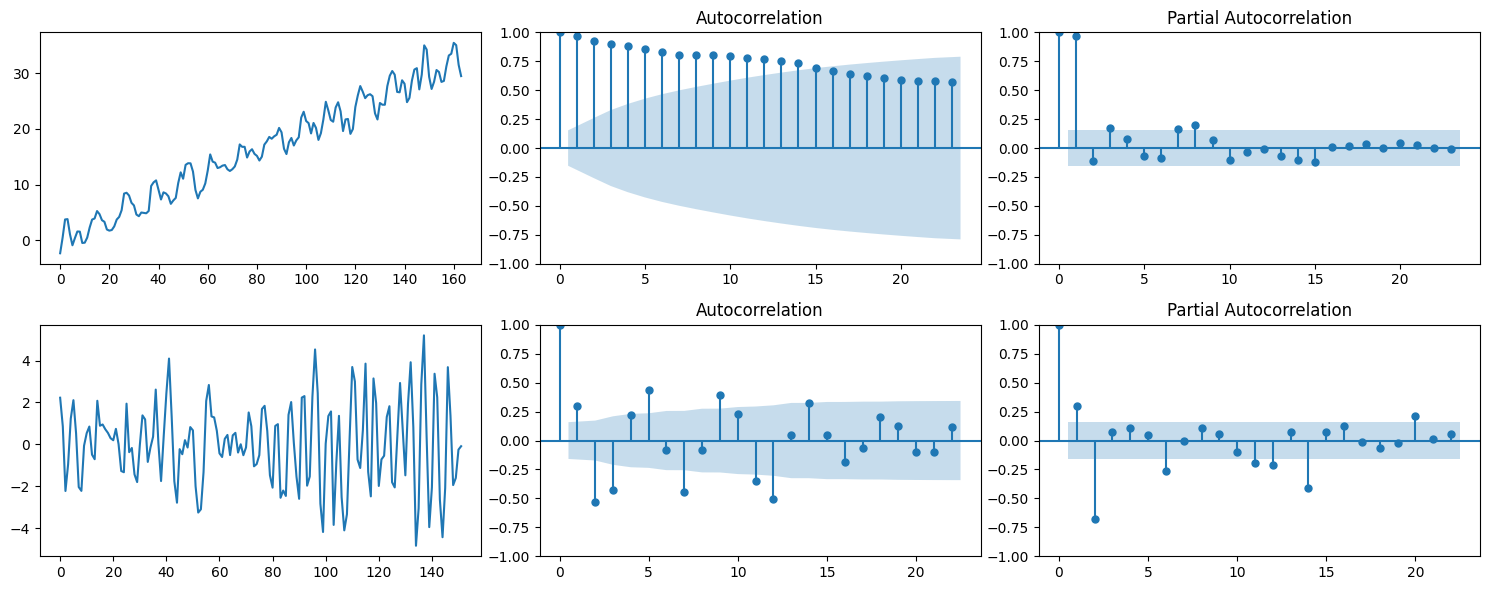

In [29]:
# azot: –º–æ–∂–µ—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥–µ—Ç—Ä–µ–Ω–¥ –∏ –ø–æ—Ç–æ–º –¥–∏—Ñ—Ñ —Å –ª–∞–≥–æ–º 12
# —Ç–æ–∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –ª—É—á—à–µ
detr_ar = signal.detrend(train_data_ar)
diff12_ar = detr_ar[12:] - detr_ar[:-12]
_, pvalue, _, _, _, _ = adfuller(diff12_ar)
print(f"p-value: {pvalue:.3f}")
_, ax = plt.subplots(2, 3, figsize=(15, 6))

#–∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
ax[0][0].plot(train_data_ar)
plot_acf(train_data_ar,ax=ax[0][1])
plot_pacf(train_data_ar,ax=ax[0][2])

#–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–π
ax[1][0].plot(diff12_ar)
plot_acf(diff12_ar,ax=ax[1][1])
plot_pacf(diff12_ar,ax=ax[1][2])
plt.tight_layout()

**üìù –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ**

- –ü–æ–º–∏–º–æ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è, –≤–æ–∑–Ω–∏–∫–∞—é—Ç –¥—Ä—É–≥–∏–µ –ø—Ä–æ–±–ª–µ–º—ã, –µ—Å–ª–∏ –ø–æ–ª—É—á–∞—Ç—å —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.
- –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ —Ç–µ—Ä—è—é—Ç—Å—è –≤ –Ω–∞—á–∞–ª–µ –∏–ª–∏ –≤ –∫–æ–Ω—Ü–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –∏–∑-–∑–∞ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.
    - –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–≤—ã–µ $L+1$ –∑–Ω–∞—á–µ–Ω–∏–π –¥–∞–Ω–Ω—ã—Ö —Ç–µ—Ä—è—é—Ç—Å—è.
- –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –ª–µ–≥–∫–æ –¥–æ–ø—É—Å—Ç–∏—Ç—å –æ—à–∏–±–∫–∏ –ø—Ä–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.
- –°–∏—Ç—É–∞—Ü–∏—è –µ—â–µ –±–æ–ª—å—à–µ –æ—Å–ª–æ–∂–Ω—è–µ—Ç—Å—è –µ—Å–ª–∏ —Å—É—â–µ—Å—Ç–≤–µ—Ç —Ä–∞–∑—Ä—ã–≤ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –∏–ª–∏ –∫–æ–≥–¥–∞ –≥–æ—Ä–∏–∑–æ–Ω—Ç –ø—Ä–æ–≥–Ω–æ–∑–∞ $H$ –≤—ã—Ö–æ–¥–∏—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ $L$.

#### –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø—É—Ç–µ–º –≤—ã—á–∏—Ç–∞–Ω–∏—è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

- –ú—ã –º–æ–≥–ª–∏ –±—ã –æ—Ü–µ–Ω–∏—Ç—å —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é —Ç—Ä–æ–π–Ω–æ–≥–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è (TES).
- –ó–∞—Ç–µ–º –º—ã –≤—ã—á–∏—Å–ª—è–µ–º –æ—Å—Ç–∞—Ç–∫–∏, –≤—ã—á–∏—Ç–∞—è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.
- –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –Ω–∞–º–Ω–æ–≥–æ –±–ª–∏–∂–µ –∫ –Ω–∞—à–∏–º –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–º –¥–∞–Ω–Ω—ã–º.

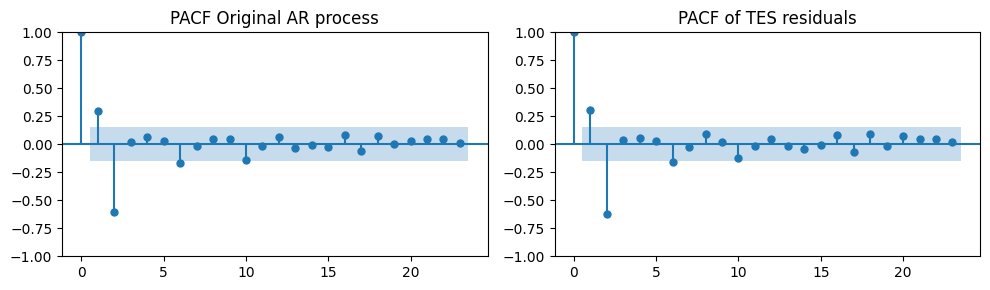

In [30]:
tes = ExponentialSmoothing(train_data_ar, trend='add',
                           seasonal='add', seasonal_periods=12).fit()
trend_and_seasonality = tes.fittedvalues # Estimated trend and seasonality
tes_resid = train_data_ar - trend_and_seasonality

_, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_pacf(ar_data[:len(train_data_ar)], ax=axes[0], title="PACF Original AR process")
plot_pacf(tes_resid, ax=axes[1], title="PACF of TES residuals")
plt.tight_layout();

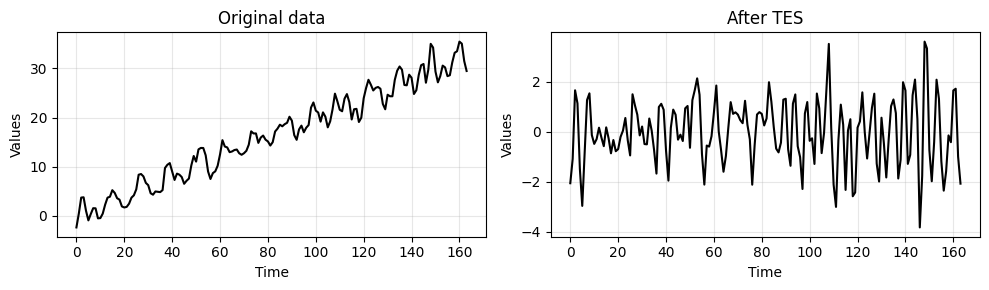

In [31]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
run_sequence_plot(time[:len(train_data_ar)], train_data_ar, title="Original data", ax=ax[0])
run_sequence_plot(time[:len(train_data_ar)], tes_resid, title="After TES", ax=ax[1])
plt.tight_layout()

**üí° –ü–æ–¥—Å–∫–∞–∑–∫–∞**

- –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –∑–Ω–∞–ª–∏, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –ø–µ—Ä–∏–æ–¥ —Ä–∞–≤–µ–Ω `12`.
- –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ, –Ω–∞–º –Ω—É–∂–Ω–æ –µ–≥–æ –æ—Ü–µ–Ω–∏—Ç—å.
- –ú—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é `fft_analysis` —Ñ—É–Ω–∫—Ü–∏—é –∏–∑ `–ó–∞–¥–∞–Ω–∏—è 1`.

In [32]:
from scipy.fft import fft

In [33]:
def fft_analysis(signal):

    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend

    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")

    return dominant_period, positive_frequencies, magnitudes

In [34]:
period, _, _ =fft_analysis(time_series_ar)
print(f"Period: {np.round(period)}")

Dominant Frequency: 0.085
Dominant Period: 11.76 time units
Period: 12.0


**‚ö† –í–Ω–∏–º–∞–Ω–∏–µ**

- –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –∑–¥–µ—Å—å —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–∞–∫ —Ö–æ—Ä–æ—à–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –∏–≥—Ä—É—à–µ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –∞–¥–¥–∏—Ç–∏–≤–Ω—ã–º–∏ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º–∏, –ª–∏–Ω–µ–π–Ω—ã–º —Ç—Ä–µ–Ω–¥–æ–º, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π –∏ —Ç.–¥...
- –ú–Ω–æ–≥–∏–µ —Ä–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤—ã–≥–ª—è–¥—è—Ç –Ω–µ —Ç–∞–∫ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω–æ.
- –í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞—è—Ö –Ω–∞–º –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø–æ–ª–∞–≥–∞—Ç—å—Å—è –Ω–∞ –¥—Ä—É–≥–∏–µ –º–µ—Ç–æ–¥—ã, –≤–∫–ª—é—á–∞—è –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞—Ü–∏—é –∏ "–≥—Ä—è–∑–Ω—ã–π" –≥—Ä–∞—Ñ–∏–∫ ACF/PACF, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–∞ –µ–≥–æ –æ—Å–Ω–æ–≤–µ.

### –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é AR-–º–æ–¥–µ–ª–∏

- –ö–∞–∫ —Ç–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞–ª–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏, –º—ã –≥–æ—Ç–æ–≤—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å AR(2).
- –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–æ–≥–æ, –∫–∞–∫–æ–π –º–µ—Ç–æ–¥ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –º—ã –¥–æ–ª–∂–Ω—ã –±—É–¥–µ–º –¥–µ–ª–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—è, —á—Ç–æ–±—ã –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—ã.
- –î–∞–≤–∞–π—Ç–µ –Ω–∞—á–Ω–µ–º —Å–æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.

**–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è**

- –°–Ω–∞—á–∞–ª–∞ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º `diff_diff_ar` —á—Ç–æ–±—ã –æ–±—É—á–∏—Ç—å AR(2)-–º–æ–¥–µ–ª—å –∏ —Å–¥–µ–ª–∞—Ç—å  –ø—Ä–æ–≥–Ω–æ–∑—ã –Ω–∞ –ø–µ—Ä–∏–æ–¥, —Ä–∞–≤–Ω—ã–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —á–µ—Ä–µ–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –≤—Ä–µ–º—è –ø—Ä–æ–≥–Ω–æ–∑ –æ–±–Ω—É–ª—è–µ—Ç—Å—è.
- –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å AR(2) –æ—á–µ–Ω—å –Ω–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

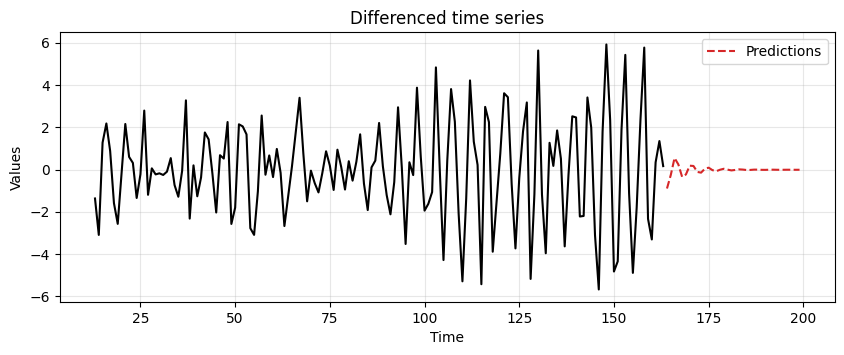

In [35]:
# Fit the model
model = ARIMA(diff_diff_ar, order=(2,0,0))
model_fit = model.fit()

# Compute predictions
diff_preds = model_fit.forecast(steps=len(test_data_ar))

ax = run_sequence_plot(time[13:len(train_data_ar)], diff_diff_ar, "")
ax.plot(time[len(train_data_ar):], diff_preds, label='Predictions', linestyle='--', color='tab:red')
plt.title('Differenced time series')
plt.legend();

- –ß—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã, –º—ã –¥–æ–ª–∂–Ω—ã —Å–Ω–∞—á–∞–ª–∞ –≤–µ—Ä–Ω—É—Ç—å —Å–µ–∑–æ–Ω–Ω—É—é —Ä–∞–∑–Ω–∏—Ü—É, –∞ –∑–∞—Ç–µ–º —Ä–∞–∑–Ω–∏—Ü—É 1-–≥–æ –ø–æ—Ä—è–¥–∫–∞.

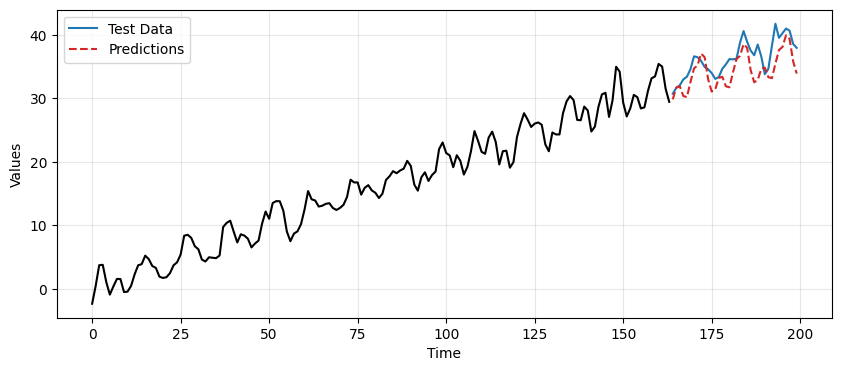

In [36]:
# Reintegrating the seasonal differencing
reintegrated_seasonal = np.zeros(len(test_data_ar))
reintegrated_seasonal[:12] = diff_ar[-12:] + diff_preds[:12]
for i in range(12, len(test_data_ar)):
    reintegrated_seasonal[i] = reintegrated_seasonal[i-12] + diff_preds[i]

# Reintegrating 1st order differencing
reintegrated = reintegrated_seasonal.cumsum() + train_data_ar[-1]

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time[:len(train_data_ar)], train_data_ar, "", ax=ax)
ax.plot(time[len(train_data_ar):], test_data_ar, label='Test Data', color='tab:blue')
ax.plot(time[len(train_data_ar):], reintegrated, label='Predictions', linestyle='--', color='tab:red')
plt.legend();

**‚ö† –í–Ω–∏–º–∞–Ω–∏–µ**

- –û—á–µ–Ω—å –ª–µ–≥–∫–æ –¥–æ–ø—É—Å—Ç–∏—Ç—å –æ—à–∏–±–∫–∏ —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ –ø—Ä–∏ –æ–±—Ä–∞—Ç–Ω–æ–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –æ–ø–µ—Ä–∞—Ü–∏–∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.
- –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é—Ç, —á—Ç–æ –º–µ–∂–¥—É –æ–±—É—á–∞—é—â–∏–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –Ω–µ—Ç —Ä–∞–∑—Ä—ã–≤–æ–≤.

**–ü–æ–¥—Ö–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤–µ TES**

- –î–∞–ª–µ–µ –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—É—Ç–µ–º –≤—ã—á–∏—Ç–∞–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏, –æ—Ü–µ–Ω–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —Ç—Ä–æ–π–Ω–æ–≥–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è (TES).
- –í —ç—Ç–æ—Ç —Ä–∞–∑ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º `tes_resid` –¥–ª—è –æ–±—É—á–µ–Ω–∏—è AR(2)-–º–æ–¥–µ–ª–∏ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–æ–≤.

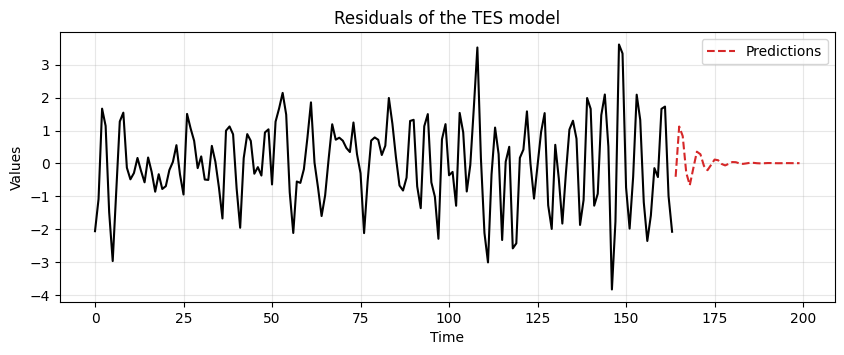

In [37]:
model = ARIMA(tes_resid, order=(2,0,0))
model_fit = model.fit()

resid_preds = model_fit.forecast(steps=len(test_data_ar))

ax = run_sequence_plot(time[:len(train_data_ar)], tes_resid, "")
ax.plot(time[len(train_data_ar):], resid_preds, label='Predictions', linestyle='--', color='tab:red')
plt.title('Residuals of the TES model')
plt.legend();

- –ó–∞—Ç–µ–º –º—ã –¥–æ–±–∞–≤–ª—è–µ–º –æ–±—Ä–∞—Ç–Ω–æ —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º.
- –î–ª—è —ç—Ç–æ–≥–æ –º—ã —Å–Ω–∞—á–∞–ª–∞ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã –¥–ª—è —Ç—Ä–µ–Ω–¥–æ–≤–æ–π –∏ —Å–µ–∑–æ–Ω–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö —Å –ø–æ–º–æ—â—å—é TES.
- –ù–∞–∫–æ–Ω–µ—Ü, –º—ã —Å—É–º–º–∏—Ä—É–µ–º –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

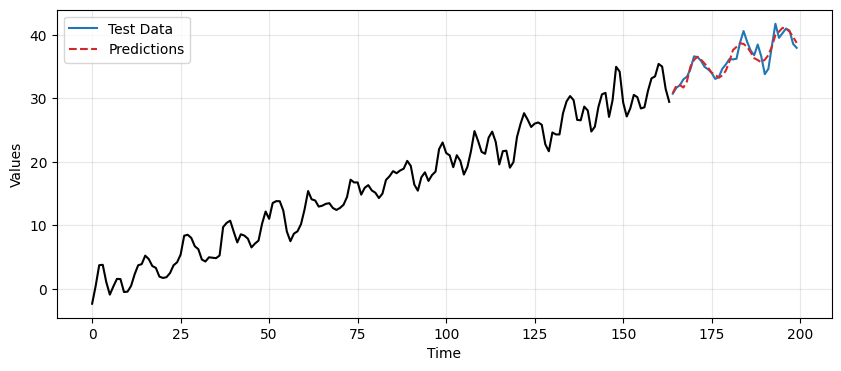

In [38]:
# Add back trend and seasonality to the predictions
tes_pred = tes.forecast(len(test_data_ar))
final_preds = tes_pred + resid_preds

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time[:len(train_data_ar)], train_data_ar, "", ax=ax)
ax.plot(time[len(train_data_ar):], test_data_ar, label='Test Data', color='tab:blue')
ax.plot(time[len(train_data_ar):], final_preds, label='Predictions', linestyle='--', color='tab:red')
plt.legend();

- –ò—Å–ø–æ–ª—å–∑—É—è –ø–æ–¥—Ö–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤–µ TES, –º—ã –ø–æ–ª—É—á–∞–µ–º –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ–º.
- –ú—ã –º–æ–∂–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞–∑–Ω–∏—Ü—É –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤—ã—á–∏—Å–ª–∏–≤ MSE (—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É).

In [39]:
mse_differencing = mean_squared_error(test_data_ar, reintegrated)
mse_tes = mean_squared_error(test_data_ar, final_preds)

print(f"MSE of differencing: {mse_differencing:.2f}")
print(f"MSE of TES: {mse_tes:.2f}")

MSE of differencing: 7.16
MSE of TES: 1.11


---

## –ú–æ–¥–µ–ª–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (MA)

- –î—Ä—É–≥–∏–º –ø–æ–¥—Ö–æ–¥–æ–º –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é –æ–¥–Ω–æ–º–µ—Ä–Ω—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (MA).
- –ú–æ–¥–µ–ª—å MA –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Ç–µ–∫—É—â–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ä—è–¥–∞ –Ω–∞ –±–µ–ª—ã–π —à—É–º –æ—Ç –æ–¥–Ω–æ–≥–æ –∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ä—è–¥–∞.
- –®—É–º –≤ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º —Å –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –æ–∂–∏–¥–∞–Ω–∏–µ–º 0 –∏ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π.

- –ú–æ–¥–µ–ª—å MA –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º —É—Ä–∞–≤–Ω–µ–Ω–∏–µ–º:

$$X(t) = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$

- –≥–¥–µ:
    - $X(t)$: –∑–Ω–∞—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t$.
    - $\mu$: —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞.
    - $\theta_1, \theta_2, \dots, \theta_q$: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏.
    - $q$: –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏ MA (—á–∏—Å–ª–æ –∑–∞–ø–∞–∑–¥—ã–≤–∞—é—â–∏—Ö –æ—à–∏–±–æ–∫).
    - $\epsilon_t$: –æ—à–∏–±–∫–∞ (–±–µ–ª—ã–π —à—É–º) –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t$.

- –ú–æ–¥–µ–ª–∏ MA –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—é—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ–º –∏ –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –æ—à–∏–±–∫–æ–π —Å –ø–æ–º–æ—â—å—é —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –ø—Ä–∏–º–µ–Ω—è–µ–º–æ–≥–æ –∫ –∑–∞–ø–∞–∑–¥—ã–≤–∞—é—â–∏–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º.
- –û–±—É—á–µ–Ω–∏–µ MA-–º–æ–¥–µ–ª–∏ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–æ, —á–µ–º –¥–ª—è –º–æ–¥–µ–ª–µ–π AR, –ø–æ—Å–∫–æ–ª—å–∫—É –æ—à–∏–±–∫–∏ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ–º—ã.
- –ü–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω—ã–µ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.
- –ú–æ–¥–µ–ª–∏ MA –º–µ–Ω–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã, —á–µ–º –º–æ–¥–µ–ª–∏ AR.
- –ö–∞–∫ –∏ –º–æ–¥–µ–ª–∏ AR, –º–æ–¥–µ–ª–∏ MA —Ç—Ä–µ–±—É—é—Ç, —á—Ç–æ–±—ã –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏.

**‚ö† –í–Ω–∏–º–∞–Ω–∏–µ**
- –ú—ã –≥–æ–≤–æ—Ä–∏–ª–∏ –æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–∏ —Å –ø–æ–º–æ—â—å—é —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö –≤ `–ó–∞–¥–∞–Ω–∏–∏ 3`.
- –ú–æ–¥–µ–ª–∏ MA –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Ç–µ–º–∏ –∂–µ —Å–∞–º—ã–º–∏ —Ç–µ—Ö–Ω–∏–∫–∞–º–∏ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è.
- –ö–∞–∂–¥–∞—è –∏–∑ –Ω–∏—Ö –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ, –≤–∞–∂–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.
- –ù–∞–º –Ω–µ —Å–ª–µ–¥—É–µ—Ç –ø—É—Ç–∞—Ç—å –∏—Ö.

### –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ MA

- –†–∞–Ω–µ–µ, –≤ —Ä–∞–∑–¥–µ–ª–µ `–û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä—è–¥–∫–∞ –º–æ–¥–µ–ª–∏  AR` –º—ã –≤—ã–±–∏—Ä–∞–ª–∏ –∫ –∫–∞—á–µ—Å—Ç–≤–µ $p$ –ª–∞–≥, –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–∏–∫–∏ –≤ PACF —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏–º—ã–º–∏.
- –î–ª—è –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ—Ä—è–¥–∫–∞ $q$ –º–æ–¥–µ–ª–∏ MA –º—ã –¥–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ, –Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º –≥—Ä–∞—Ñ–∏–∫ ACF.
- –î–∞–≤–∞–π—Ç–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —ç—Ç–æ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ

- –ú—ã –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ –ø—Ä–æ—Ü–µ—Å—Å–∞ MA(2) —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ `[1.0, 0.7, 0.8]`.
- –°–Ω–æ–≤–∞, –∑–Ω–∞—á–µ–Ω–∏–µ `1.0` –≤ –Ω–∞—á–∞–ª–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –Ω—É–ª–µ–≤–æ–º—É –ª–∞–≥—É.

In [40]:
ma = np.array([1.0, 0.7, 0.8])  # MA parameters
ma_data = arma_generate_sample(np.array([1]), ma, nsample=len(time), scale=1, burnin=1000) # MA process

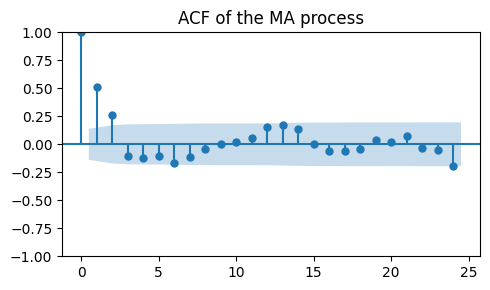

In [41]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_acf(ma_data, ax=ax, title="ACF of the MA process")
plt.tight_layout();

- –ö–∞–∫ –∏ –æ–∂–∏–¥–∞–ª–æ—Å—å, –ø–æ—Å–ª–µ –≤—Ç–æ—Ä–æ–≥–æ –ª–∞–≥–∞ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ–±—Ä–µ–∑–∞–Ω–∏–µ.
- —Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (MA) —Ä–∞–≤–µ–Ω $q=2$.

- –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞ –ø—Ä–æ—Ü–µ—Å—Å–∞ MA ‚Äî —ç—Ç–æ –º–µ–¥–ª–µ–Ω–Ω–æ —É–±—ã–≤–∞—é—â–∏–µ, —á–µ—Ä–µ–¥—É—é—â–∏–µ—Å—è –ø–∏–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ PACF.
- –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, –∫–∞–∫ —ç—Ç–æ –¥–æ–ø–æ–ª–Ω—è–µ—Ç —Ç–æ, —á—Ç–æ –º—ã –≤–∏–¥–µ–ª–∏ –¥–ª—è –ø—Ä–æ—Ü–µ—Å—Å–∞ AR.

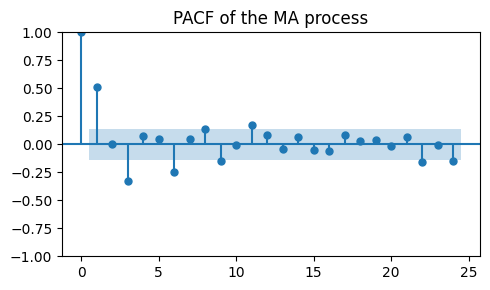

In [42]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_pacf(ma_data, ax=ax, title="PACF of the MA process")
plt.tight_layout();

**‚öô –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–∞–º–∏**

- –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –∏–∑–º–µ–Ω–∏—Ç—å/–¥–æ–±–∞–≤–∏—Ç—å/—É–¥–∞–ª–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞—Ö `ma` –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `arma_generate_sample`.
- –ó–∞—Ç–µ–º –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏—Ç—Å—è –≥—Ä–∞—Ñ–∏–∫ ACF.

In [43]:
def ma_sample_show(ma):
    ma_data = arma_generate_sample(ar=[1],ma=ma,nsample=200,scale=1, burnin=1000)

    run_sequence_plot(np.arange(200),ma_data,'MA data')
    
    _, ax = plt.subplots(1, 2, figsize=(12, 3))

    # Plot ACF
    plot_acf(ma_data, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Plot PACF
    plot_pacf(ma_data, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')
    plt.tight_layout()

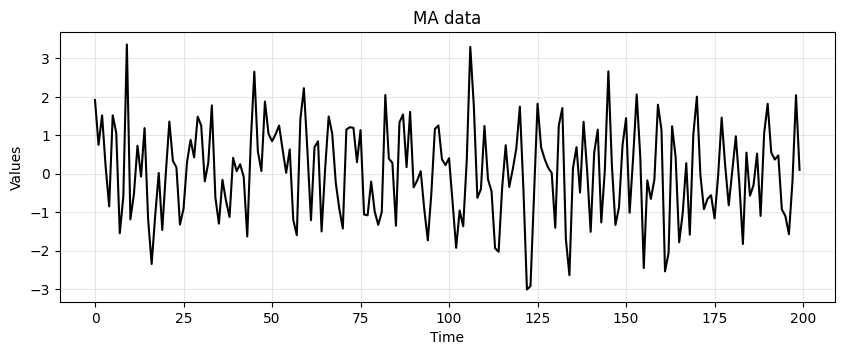

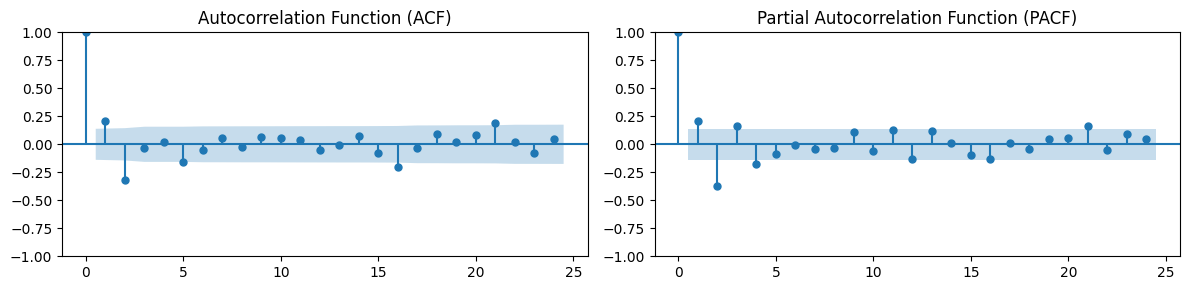

In [44]:
# ACF –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–Ω—É–ª–µ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ MA
# PACF —É–±—ã–≤–∞–µ—Ç –º–µ–¥–ª–µ–Ω–Ω–µ–µ —á–µ–º ACF (–≤–∏–¥–∏–º–æ —á–µ—Ä–µ–¥—É—é—â–∏–µ—Å—è –ø–æ –∑–Ω–∞–∫—É –ø–∏–∫–∏ –Ω–µ —Ç–∞–∫ –≤–∞–∂–Ω—ã)
ma_sample_show([1,0.4,-0.3])

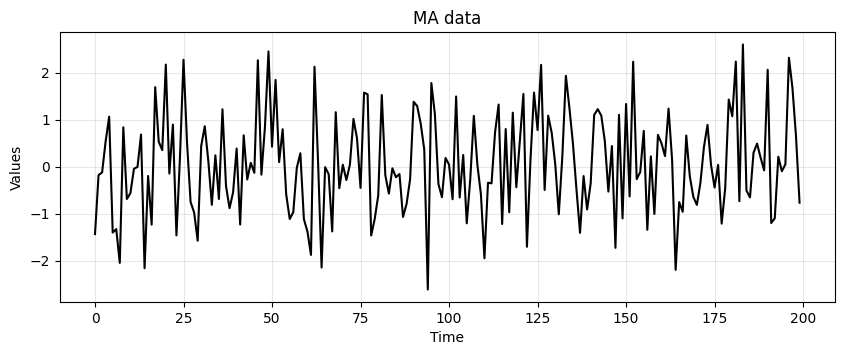

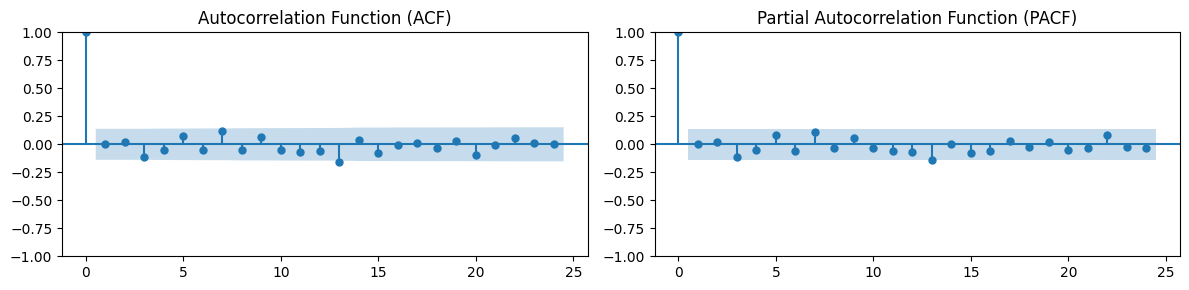

In [45]:
ma_sample_show([1])

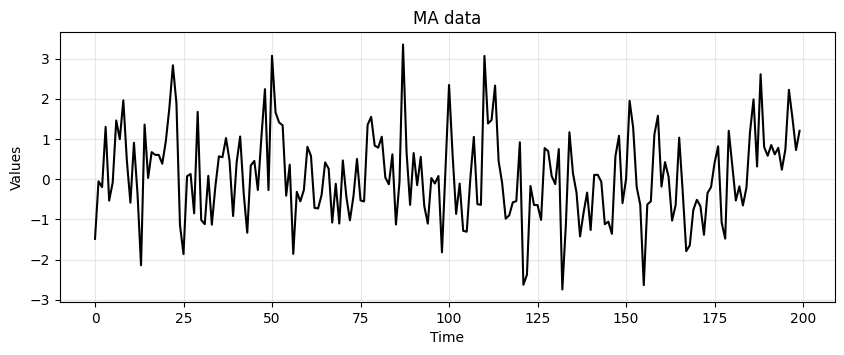

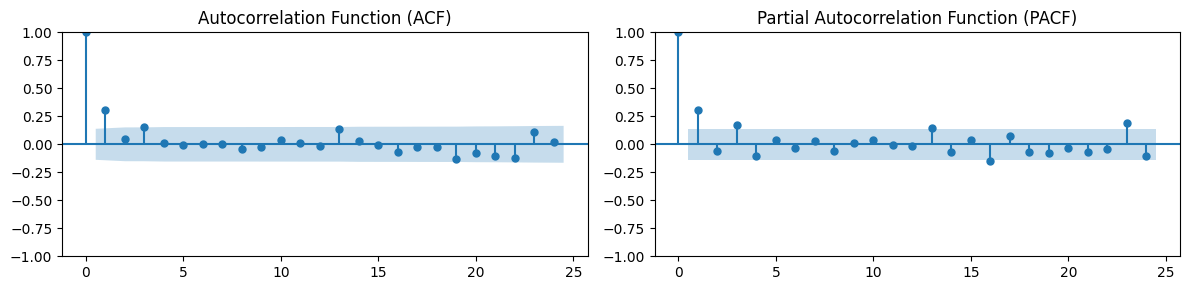

In [46]:
ma_sample_show([1,0.4,0,0.3])

### –ü—Ä–∏–º–µ—Ä: –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –º–æ–¥–µ–ª—å—é MA

- –ú—ã –ø–æ–≤—Ç–æ—Ä—è–µ–º —Ç—É –∂–µ –ø—Ä–æ—Ü–µ–¥—É—Ä—É, —á—Ç–æ –∏ –≤ –ø—Ä–∏–º–µ—Ä–µ —Å `AR –º–æ–¥–µ–ª—å—é`, –Ω–æ —Ç–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º `–º–æ–¥–µ–ª—å MA`.
- –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ—Ç–ª–∏—á–∏–µ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –º—ã —Å—Ç—Ä–æ–∏–º –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, –∏—Å–ø–æ–ª—å–∑—É—è –ø—Ä–æ—Ü–µ—Å—Å MA, –∞ –Ω–µ AR.

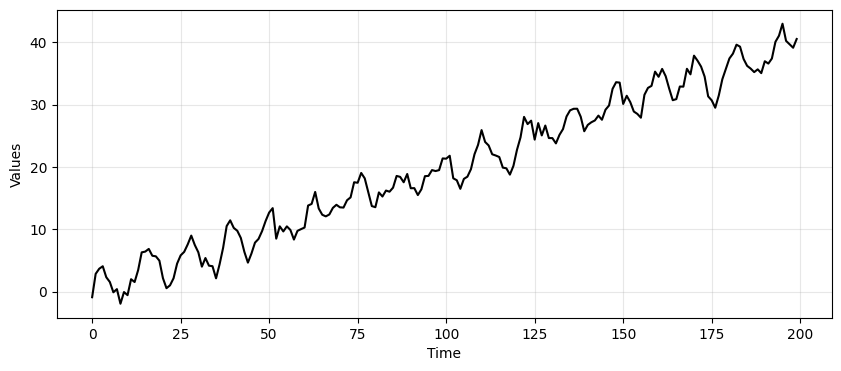

In [47]:
time_series_ma = trend + seasonality + ma_data

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time, time_series_ma, "", ax=ax);

In [48]:
# Train/test split
train_data_ma = time_series_ma[:164]
test_data_ma = time_series_ma[164:]

- –ß—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø–æ—Ä—è–¥–æ–∫ $q$ –º–æ–¥–µ–ª–∏ MA, –Ω—É–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ ACF.
- –î–∞–≤–∞–π—Ç–µ –Ω–∞—á–Ω–µ–º —Å –≤—ã—á–∏—Å–ª–µ–Ω–∏—è ACF –¥–ª—è `train_data_ma`, –∫–æ—Ç–æ—Ä—ã–π –≤—ã–≥–ª—è–¥–∏—Ç —Å–æ–≤—Å–µ–º –ø–æ-–¥—Ä—É–≥–æ–º—É –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –≥—Ä–∞—Ñ–∏–∫–æ–º ACF, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø–æ–ª—É—á–∏–ª–∏ —Ä–∞–Ω–µ–µ –¥–ª—è –ø—Ä–æ—Ü–µ—Å—Å–∞ MA.

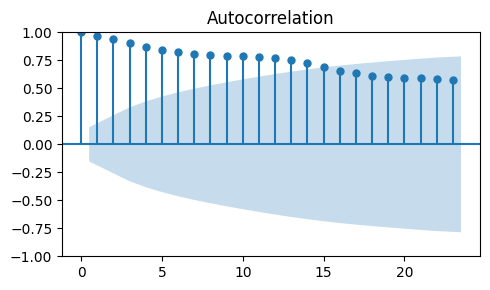

In [49]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
plot_acf(train_data_ma, ax=ax)
plt.tight_layout();

- –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –Ω–∞–º —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ ACF.
- –ö–∞–∫ –∏ –≤ —Å–ª—É—á–∞–µ —Å AR, —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞ –¥–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ MA.

#### –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ

- –ö–∞–∫ –∏ –≤ –ø—Ä–∏–º–µ—Ä–µ —Å AR, –º—ã –ø–æ–ø—Ä–æ–±—É–µ–º –¥–æ–±–∏—Ç—å—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —á–µ—Ä–µ–∑ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ.


In [50]:
diff_ma = train_data_ma[1:] - train_data_ma[:-1]

- –ß—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã, –º—ã –≤—ã—á–∏—Å–ª–∏–º —Ç–µ—Å—Ç ADF –¥–æ –∏ –ø–æ—Å–ª–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.

In [51]:
_, pvalue_ts, _, _, _, _ = adfuller(train_data_ma)
_, pvalue_diff, _, _, _, _ = adfuller(diff_ma)
print(f"p-value (original ts): {pvalue_ts:.3f}")
print(f"p-value (differenced ts): {pvalue_diff:.3f}")

p-value (original ts): 0.983
p-value (differenced ts): 0.000


- –ú—ã —Ç–∞–∫–∂–µ —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—á–∏—Å–ª—è–µ–º ACF.

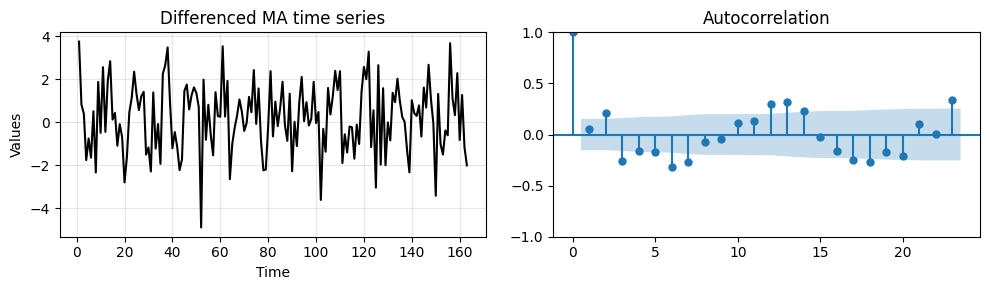

In [52]:
_, axes = plt.subplots(1,2, figsize=(10, 3))
run_sequence_plot(time[1:len(train_data_ma)], diff_ma, "Differenced MA time series", ax=axes[0])
plot_acf(diff_ma, ax=axes[1])
plt.tight_layout();

- –ö–∞–∫ –∏ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —Å–ª—É—á–∞–µ, —É –Ω–∞—Å –µ—Å—Ç—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–∞ –±–æ–ª—å—à–∏—Ö –ª–∞–≥–∞—Ö –∏–∑-–∑–∞ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞.
- –î–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è, –º—ã –≤—ã—á–∏—Å–ª—è–µ–º ACF –¥–ª—è::
    - –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ MA,
    - –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –ø–æ—Å–ª–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è 1-–≥–æ –ø–æ—Ä—è–¥–∫–∞,
    - –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –ø–æ—Å–ª–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è 1-–≥–æ –ø–æ—Ä—è–¥–∫–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.

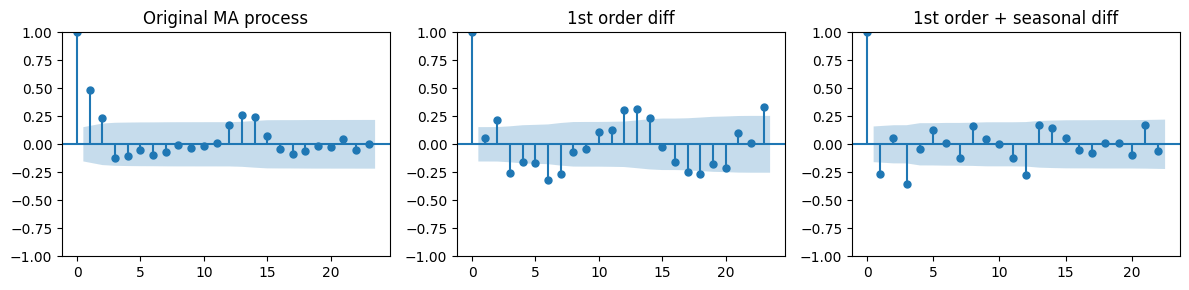

In [53]:
diff_diff_ma = diff_ma[12:] - diff_ma[:-12]

_, axes = plt.subplots(1,3, figsize=(12, 3))
plot_acf(ma_data[:len(train_data_ma)], ax=axes[0], title="Original MA process")
plot_acf(diff_ma, ax=axes[1], title="1st order diff")
plot_acf(diff_diff_ma, ax=axes[2], title="1st order + seasonal diff")
plt.tight_layout();

- –ü–æ—Å–ª–µ –æ–±–æ–∏—Ö –≤–∏–¥–æ–≤ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫ ACF –≤—ã–≥–ª—è–¥–∏—Ç —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –∏–Ω–∞—á–µ.
- –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–∞ –ª–∞–≥–∞—Ö 1 –∏ 2 –∏—Å—á–µ–∑–∞—é—Ç, –∞ –ø–µ—Ä–≤–∞—è –Ω–µ–Ω—É–ª–µ–≤–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ—è–≤–ª—è–µ—Ç—Å—è –Ω–∞ –ª–∞–≥–µ 3.
- –ö–∞–∫ –º—ã –≤–∏–¥–µ–ª–∏ –≤ —Å–ª—É—á–∞–µ —Å AR, —ç—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–º –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–∏.

- –í –∏—Ç–æ–≥–µ, –Ω–µ –æ—á–µ–≤–∏–¥–Ω–æ, –∫–∞–∫—É—é –º–æ–¥–µ–ª—å MA –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –∞–Ω–∞–ª–∏–∑–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ ACF.
- ACF –ø–æ—Å–ª–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–æ—Ä—è–¥–∫–∞ $q=1$ –∏–ª–∏ $q=2$.
- ACF, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –ø–æ—Å–ª–µ —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –ø–æ—Ä—è–¥–æ–∫ $q=3$, , –Ω–æ –º—ã –ø–æ–¥–æ–∑—Ä–µ–≤–∞–µ–º —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ.

#### –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø—É—Ç–µ–º –≤—ã—á–∏—Ç–∞–Ω–∏—è –æ—Ü–µ–Ω–µ–Ω–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

- –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º—ã –ø–æ–≤—Ç–æ—Ä—è–µ–º —Ç—É –∂–µ –ø—Ä–æ—Ü–µ–¥—É—Ä—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º TES.
- –ü–æ—Å–∫–æ–ª—å–∫—É –ø—Ä–æ—Ü–µ—Å—Å MA –±–æ–ª–µ–µ "—à—É–º–Ω—ã–π", —á–µ–º –ø—Ä–æ—Ü–µ—Å—Å AR, –º—ã —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º —É—Ä–æ–≤–µ–Ω—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è, —É—Å—Ç–∞–Ω–æ–≤–∏–≤ $\alpha=0.01$.
- –ö–∞–∫ –ø–æ–∫–∞–∑–∞–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–∏–∂–µ, —ç—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –±–æ–ª–µ–µ –≥–ª–∞–¥–∫–æ–π –æ—Ü–µ–Ω–∫–µ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏.

Dominant Frequency: 0.085
Dominant Period: 11.76 time units


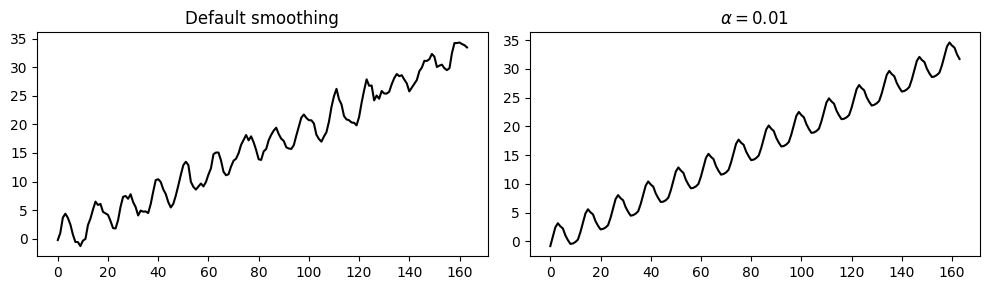

In [54]:
period, _, _ =fft_analysis(time_series_ma)
period = np.round(period).astype(int)

tes_ma_default = ExponentialSmoothing(train_data_ma, trend='add',
                           seasonal='add', seasonal_periods=period).fit(smoothing_level=None)
tes_ma = ExponentialSmoothing(train_data_ma, trend='add',
                           seasonal='add', seasonal_periods=period).fit(smoothing_level=0.01)
trend_and_seasonality_default = tes_ma_default.fittedvalues
trend_and_seasonality = tes_ma.fittedvalues

_, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(trend_and_seasonality_default, 'k')
axes[0].set_title('Default smoothing')
axes[1].plot(trend_and_seasonality, 'k')
axes[1].set_title('$\\alpha=0.01$')
plt.tight_layout();

- –î–∞–ª–µ–µ –º—ã –≤—ã—á–∏—Å–ª—è–µ–º –æ—Å—Ç–∞—Ç–∫–∏, –≤—ã—á–∏—Ç–∞—è –æ—Ü–µ–Ω–µ–Ω–Ω—ã–µ —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.
- –ì—Ä–∞—Ñ–∏–∫–∏ ACF –¥–ª—è –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ MA –∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏.
- –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —É–¥–∞–ª–∏–ª–∏ —Ç—Ä–µ–Ω–¥ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.

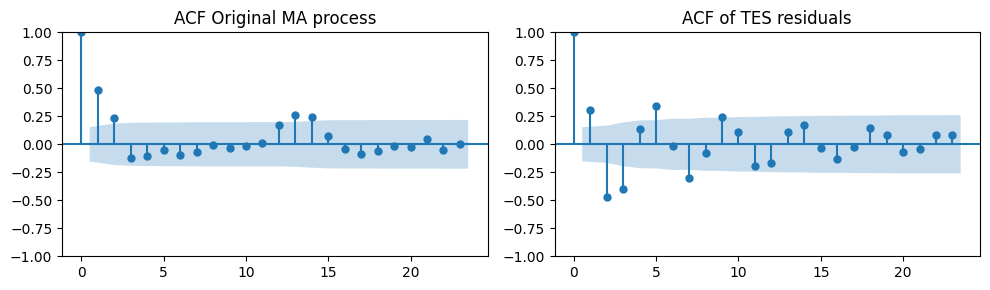

In [55]:
tes_resid_ma = train_data_ma - trend_and_seasonality

_, axes = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(ma_data[:len(train_data_ma)], ax=axes[0], title="ACF Original MA process")
plot_acf(tes_resid, ax=axes[1], title="ACF of TES residuals")
plt.tight_layout();

- –ì—Ä–∞—Ñ–∏–∫ ACF –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—Å–ø–ª–µ—Å–∫ –Ω–∞ –ª–∞–≥–µ 3.
- –≠—Ç–æ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ MA –ø–æ—Ä—è–¥–∫–∞ $q=3$.
- –ö–∞–∫ –∏ –≤ —Å–ª—É—á–∞–µ —Å AR, –º—ã –≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã, –∏—Å–ø–æ–ª—å–∑—É—è –∫–∞–∫ –º–µ—Ç–æ–¥ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è, —Ç–∞–∫ –∏ –ø–æ–¥—Ö–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤–µ TES.

**–ü–æ–¥—Ö–æ–¥ —Å –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ–º**

- –°–Ω–∞—á–∞–ª–∞ –º—ã –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å MA –Ω–∞ –¥–∞–Ω–Ω—ã—Ö `diff_diff_ma` –∏ –≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã.
- –ó–∞–º–µ—Ç—å—Ç–µ, —á—Ç–æ, —Ö–æ—Ç—è –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã —Å –ø—Ä–æ—Ü–µ—Å—Å–æ–º MA(2), –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–æ—Ü–µ—Å—Å MA(3), —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ ACF `diff_diff_ma` –±—ã–ª –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—Å–ø–ª–µ—Å–∫ –Ω–∞ –ª–∞–≥–µ 3.

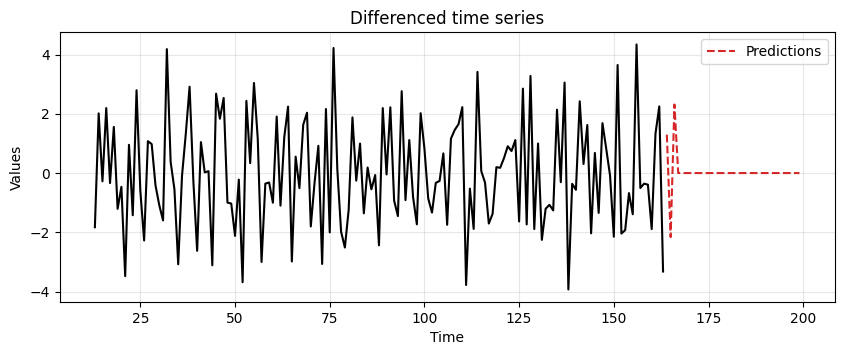

In [56]:
# Fit the model
model = ARIMA(diff_diff_ma, order=(0,0,3))
model_fit = model.fit()

# Compute predictions
diff_preds = model_fit.forecast(steps=len(test_data_ma))

ax = run_sequence_plot(time[13:len(train_data_ma)], diff_diff_ma, "")
ax.plot(time[len(train_data_ma):], diff_preds, label='Predictions', linestyle='--', color='tab:red')
plt.title('Differenced time series')
plt.legend();

- –ó–∞—Ç–µ–º –º—ã –æ–±—Ä–∞—â–∞–µ–º –æ–±–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã.

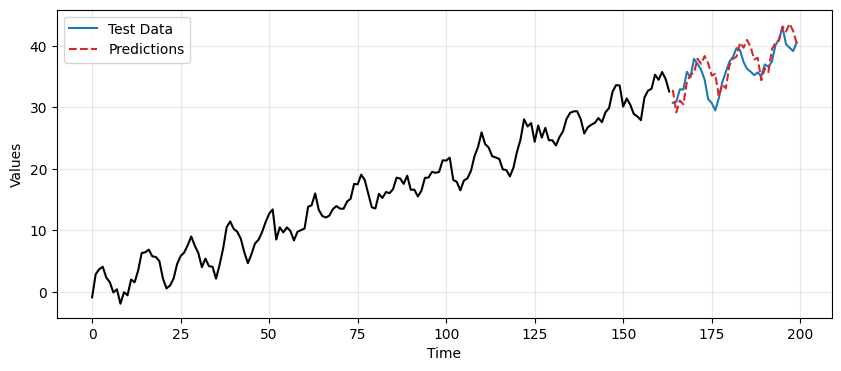

In [57]:
# Reintegrating the seasonal differencing
reintegrated_seasonal = np.zeros(len(test_data_ma))
reintegrated_seasonal[:12] = diff_ma[-12:] + diff_preds[:12]
for i in range(12, len(test_data_ma)):
    reintegrated_seasonal[i] = reintegrated_seasonal[i-12] + diff_preds[i]

# Reintegrating 1st order differencing
reintegrated = reintegrated_seasonal.cumsum() + train_data_ma[-1]

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time[:len(train_data_ma)], train_data_ma, "", ax=ax)
ax.plot(time[len(train_data_ma):], test_data_ma, label='Test Data', color='tab:blue')
ax.plot(time[len(train_data_ma):], reintegrated, label='Predictions', linestyle='--', color='tab:red')
plt.legend();

**–ü–æ–¥—Ö–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤–µ TES**

- –í —ç—Ç–æ—Ç —Ä–∞–∑ –º—ã –æ–±—É—á–∞–µ–º MA-–º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö `tes_resid_ma` –∏ –≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã.
- –ó–∞–º–µ—Ç—å—Ç–µ, —á—Ç–æ —Å–Ω–æ–≤–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–æ–¥–µ–ª—å MA(3), –¥–∞–∂–µ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –ø—Ä–æ—Ü–µ—Å—Å–æ–º MA(2).

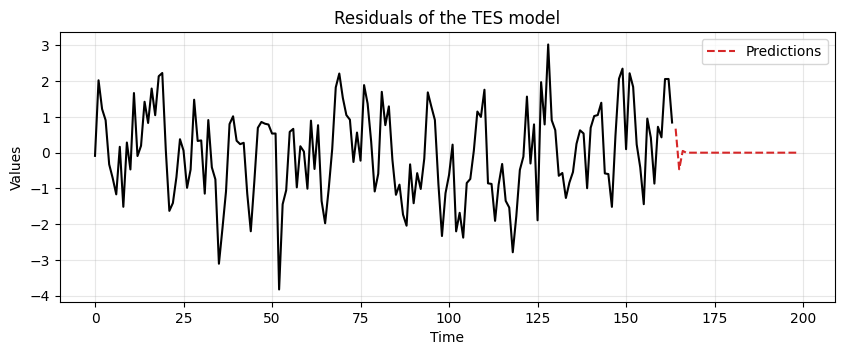

In [58]:
model = ARIMA(tes_resid_ma, order=(0,0,3))
model_fit = model.fit() # Fit the model

resid_preds = model_fit.forecast(steps=len(test_data_ma)) # Compute predictions

ax = run_sequence_plot(time[:len(train_data_ma)], tes_resid_ma, "")
ax.plot(time[len(train_data_ma):], resid_preds, label='Predictions', linestyle='--', color='tab:red')
plt.title('Residuals of the TES model')
plt.legend();

- –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–æ–≥–Ω–æ–∑—ã –ø–æ–ª—É—á–∞—é—Ç—Å—è –ø—É—Ç–µ–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è:
    - –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ –æ—Å—Ç–∞—Ç–∫–æ–≤ –∏–∑ –º–æ–¥–µ–ª–∏ MA,
    - –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏–∑ –º–æ–¥–µ–ª–∏ TES.

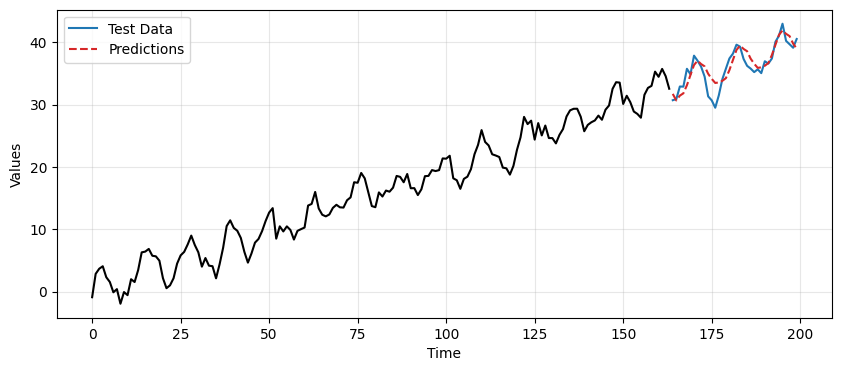

In [59]:
# Add back trend and seasonality to the predictions
tes_pred = tes_ma.forecast(len(test_data_ma))
final_preds = tes_pred + resid_preds

_, ax = plt.subplots(1, 1, figsize=(10, 4))
run_sequence_plot(time[:len(train_data_ma)], train_data_ma, "", ax=ax)
ax.plot(time[len(train_data_ma):], test_data_ma, label='Test Data', color='tab:blue')
ax.plot(time[len(train_data_ma):], final_preds, label='Predictions', linestyle='--', color='tab:red')
plt.legend();

- –ù–∞ —ç—Ç–æ—Ç —Ä–∞–∑ –º–µ—Ç–æ–¥ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –Ω–æ –≤—Å–µ –∂–µ —É—Å—Ç—É–ø–∞–µ—Ç –ø–æ–¥—Ö–æ–¥—É –Ω–∞ –æ—Å–Ω–æ–≤–µ TES.

In [60]:
mse_differencing = mean_squared_error(test_data_ma, reintegrated)
mse_tes = mean_squared_error(test_data_ma, final_preds)

print(f"MSE of differencing: {mse_differencing:.2f}")
print(f"MSE of TES: {mse_tes:.2f}")

MSE of differencing: 6.46
MSE of TES: 2.52


---

## –ò—Ç–æ–≥

### AR vs MA –º–æ–¥–µ–ª–∏

| **AR-–º–æ–¥–µ–ª–∏** | **MA-–º–æ–¥–µ–ª–∏** |
|:--------------|:--------------|
|–ó–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–æ—à–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ä—è–¥–∞. | –ó–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–æ—à–ª—ã—Ö –æ—à–∏–±–æ–∫ –ø—Ä–æ–≥–Ω–æ–∑–∞. |
| –ü–æ–¥—Ö–æ–¥—è—Ç, –∫–æ–≥–¥–∞ –ø—Ä–æ—à–ª—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞–ø—Ä—è–º—É—é –≤–ª–∏—è—é—Ç –Ω–∞ –±—É–¥—É—â–∏–µ –∏ –¥–ª—è –º–µ–¥–ª–µ–Ω–Ω–æ –∏–∑–º–µ–Ω—è—é—â–∏—Ö—Å—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤. | –ü–æ–ª–µ–∑–Ω—ã, –∫–æ–≥–¥–∞ —Ä—è–¥ –ª—É—á—à–µ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω—ã–º–∏ —à–æ–∫–∞–º–∏ –∏–ª–∏ –≤–æ–∑–º—É—â–µ–Ω–∏—è–º–∏, —Ç–æ –µ—Å—Ç—å –¥–ª—è —Ä—è–¥–æ–≤ —Å —Ä–µ–∑–∫–∏–º–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º–∏.|
| –ï—Å–ª–∏ **PACF** —Ä–µ–∑–∫–æ –æ–±—Ä—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –ª–∞–≥–µ $p$, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ **AR**-–º–æ–¥–µ–ª—å –ø–æ—Ä—è–¥–∫–∞ $p$.| –ï—Å–ª–∏ **ACF** —Ä–µ–∑–∫–æ –æ–±—Ä—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –ª–∞–≥–µ $q$, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ **MA**-–º–æ–¥–µ–ª—å –ø–æ—Ä—è–¥–∫–∞ $q$. |

–í —ç—Ç–æ–º –∑–∞–Ω—è—Ç–∏–∏ –≤—ã –¥–æ–ª–∂–Ω—ã –±—ã–ª–∏ –∏–∑—É—á–∏—Ç—å –æ—Å–Ω–æ–≤—ã:

1. –§—É–Ω–∫—Ü–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (ACF).
2. –ß–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ (PACF).
3. –ê–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã—Ö (AR) –º–æ–¥–µ–ª–µ–π.
4. –í—ã–±–æ—Ä–∞ –ø–æ—Ä—è–¥–∫–∞ $p$.
5. –ú–æ–¥–µ–ª–µ–π —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (MA).
6. –í—ã–±–æ—Ä–∞ –ø–æ—Ä—è–¥–∫–∞ $q$.
7. –ö–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ—Ç–æ–¥–æ–≤ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Å –º–æ–¥–µ–ª—è–º–∏ AR/MA –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤.

---

## –£–ø—Ä–∞–∂–Ω–µ–Ω–∏—è

- –ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–≤–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–∞ `arma_ts1` –∏ `arma_ts2` , –≤—ã–ø–æ–ª–Ω–∏–≤ —Å–ª–µ–¥—É—é—â–∏–π –∫–æ–¥.

In [61]:
# Load the first time series
response = requests.get("https://zenodo.org/records/10951538/files/arma_ts3.npz?download=1")
response.raise_for_status()
arma_ts1 = np.load(BytesIO(response.content))['signal']
print(len(arma_ts1))

# Load the second time series
response = requests.get("https://zenodo.org/records/10951538/files/arma_ts4.npz?download=1")
response.raise_for_status()
arma_ts2 = np.load(BytesIO(response.content))['signal']
print(len(arma_ts2))

479
1000


–î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞:

1. –†–∞–∑–¥–µ–ª–∏—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.
    - –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 30 –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Ä—è–¥–∞.
    - –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Ä—è–¥–∞.
2. –°–¥–µ–ª–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.
3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $p$ –¥–ª—è AR-–º–æ–¥–µ–ª–∏.
4. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ AR($p$).
5. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $q$ –¥–ª—è MA-–º–æ–¥–µ–ª–∏.
6. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ MA($q$).

**1. –†–∞–∑–¥–µ–ª–∏—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.**
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 30 –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Ä—è–¥–∞.
- –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Ä—è–¥–∞.

In [62]:
tr1 = arma_ts1[:-30]
te1 = arma_ts1[-30:]

tr2 = arma_ts2[:-100]
te2 = arma_ts2[-100:]

In [63]:
time1 = range(len(arma_ts1))
time2 = range(len(arma_ts2))

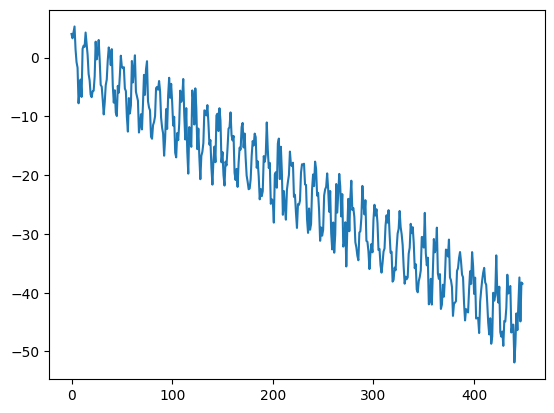

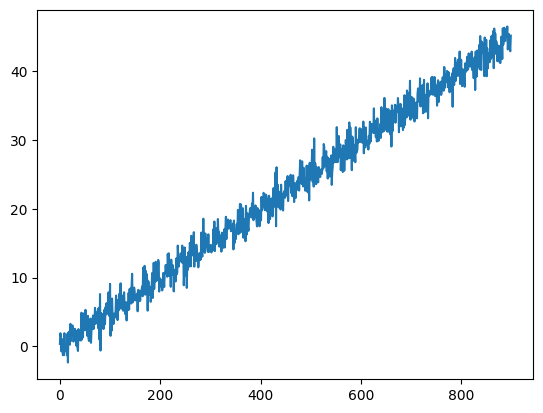

In [64]:
# —Ä—è–¥ 1 –Ω–µ —Ç–∞–∫–æ–π —à—É–º–Ω—ã–π - —Å–∫–æ—Ä–µ–µ –ø–æ–¥–æ–π–¥—ë—Ç AR –º–æ–¥–µ–ª—å
plt.plot(tr1)
plt.show()
# —Ä—è–¥ 2 –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —à—É–º–Ω—ã–π - –≤–æ–∑–º–æ–∂–Ω–æ –ª—É—á—à–µ –±—É–¥–µ—Ç —Å–µ–±—è –≤–µ—Å—Ç–∏ MA –º–æ–¥–µ–ª—å
plt.plot(tr2)
plt.show()

### –†—è–¥ 1 (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ TES) ###

**2. –°–¥–µ–ª–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.**

Dominant Frequency: 0.082
Dominant Period: 12.14 time units


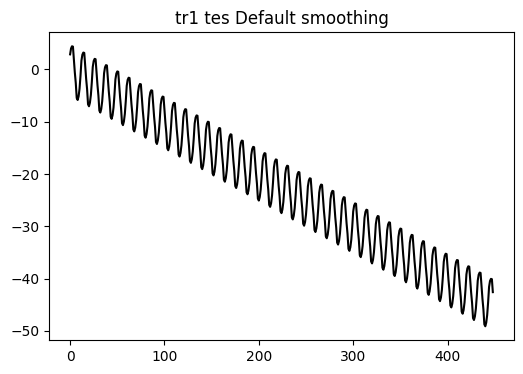

In [65]:
#–ø–µ—Ä–∏–æ–¥ - –±—ã—Å—Ç—Ä–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ
period, _, _ =fft_analysis(tr1)
period = np.round(period).astype(int)

# —Ä—è–¥ –Ω–µ —Å–ª–∏—à–∫–æ–º —à—É–º–Ω—ã–π - –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 
tr1_tes_model = ExponentialSmoothing(tr1, trend='add',
                           seasonal='add', seasonal_periods=period).fit(smoothing_level=None)
tr1_tes = tr1_tes_model.fittedvalues

_, axes = plt.subplots(1, 1, figsize=(6, 4))
axes.plot(tr1_tes, 'k')
axes.set_title('tr1 tes Default smoothing')
plt.show();

In [66]:
# –æ—Å—Ç–∞—Ç–∫–∏ 
tr1_tes_resid = tr1 - tr1_tes

# —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–π —Ç–µ—Å—Ç –î–∏–∫–∏ –§—É–ª–ª–µ—Ä–∞
# H0 —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π 
# —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å H0 
_, pvalue_tr1_tes_resid, _, _, _, _ = adfuller(tr1_tes_resid)
print(f"p-value (tr1 tes residuals): {pvalue_tr1_tes_resid}")

p-value (tr1 tes residuals): 3.0330003703140513e-19


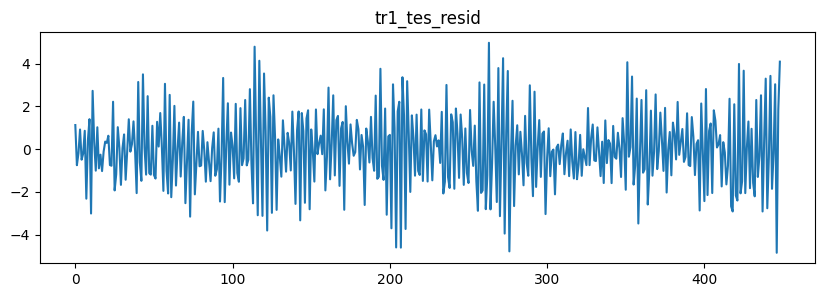

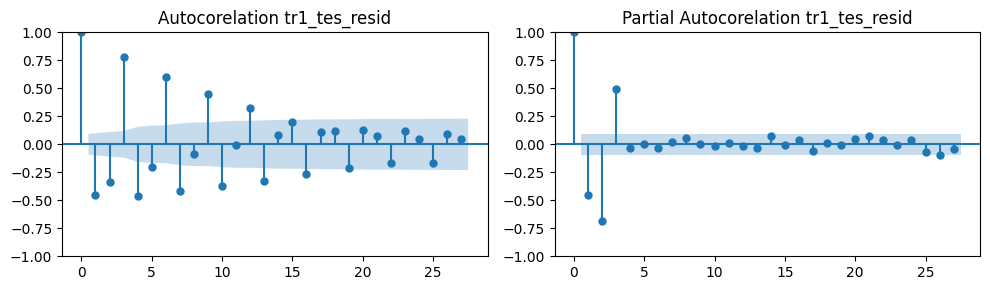

In [ ]:
# –æ—Å—Ç–∞—Ç–∫–∏ –≤–∏–∑—É–∞–ª—å–Ω–æ –Ω–µ —Å–ª–∏—à–∫–æ–º —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã
# –µ—Å—Ç—å –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –≥–¥–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è
plt.figure(figsize=(10,3))
plt.title('tr1_tes_resid')
plt.plot(tr1_tes_resid)

# —Ä–µ–∑–∫–æ –∑–∞—Ç—É—Ö–∞—é—â–∞—è PACF (–ø–æc–ª–µ –Ω–µ–±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –ª–∞–≥–æ–≤) –ø—Ä–∏–∑–Ω–∞–∫ AR –º–æ–¥–µ–ª–∏
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(tr1_tes_resid, ax=ax[0],title='Autocorelation tr1_tes_resid')
plot_pacf(tr1_tes_resid, ax=ax[1],title='Partial Autocorelation tr1_tes_resid')
plt.tight_layout();

**3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $p$ –¥–ª—è AR-–º–æ–¥–µ–ª–∏.**  
–ø–æ—Ä—è–¥–æ–∫ AR –º–æ–¥–µ–ª–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ PACF - 3

In [68]:
ar_model_tr1_tes = ARIMA(tr1_tes_resid, order=(3,0,0))
ar_model_tr1_tes_fit = ar_model_tr1_tes.fit() # Fit the model

**4. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ AR($p$).**

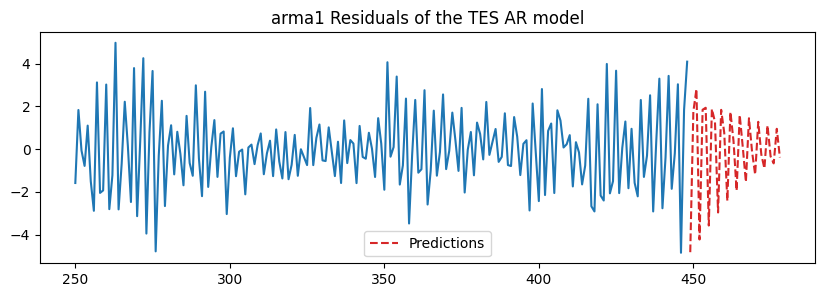

In [69]:
# –ø—Ä–æ–≥–Ω–æ–∑ TES –æ—Å—Ç–∞—Ç–∫–æ–≤ (–º–æ–¥–µ–ª—å AR(3))
# –ø—Ä–æ–≥–Ω–æ–∑ –∑–∞—Ç—É—Ö–∞–µ—Ç (—Ä–∞–∑—Ä—ã–≤ –ø—Ä–∏ –ø–µ—Ä–µ—Ö–æ–¥–µ –∫ –ø—Ä–æ–≥–Ω–æ–∑—É)
resid_ar_preds_tr1_tes = ar_model_tr1_tes_fit.forecast(steps=len(te1)) # Compute predictions

plt.figure(figsize=(10,3))
plt.plot(time1[250:-len(te1)],tr1_tes_resid[250:])
plt.plot(time1[-len(te1):], resid_ar_preds_tr1_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 Residuals of the TES AR model')
plt.legend()
plt.show();

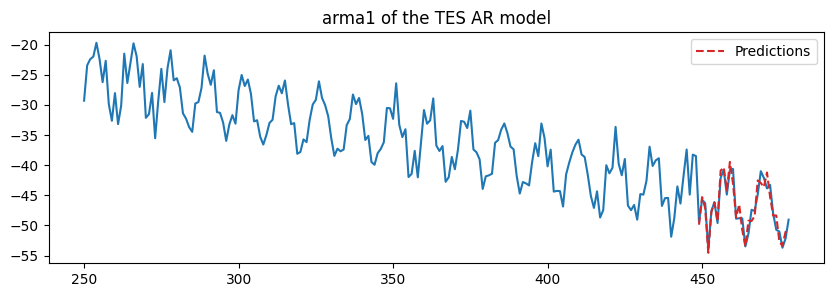

MAPE [:10]: 0.011
MAPE [10:20]: 0.033
MAPE [20:]: 0.034
MAPE: 0.026


In [ ]:
# —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å + –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏
ar_preds_tr1_tes = tr1_tes_model.forecast(len(te1)) + resid_ar_preds_tr1_tes

plt.figure(figsize=(10,3))
plt.plot(time1[250:],arma_ts1[250:])
plt.plot(time1[-len(te1):], ar_preds_tr1_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 of the TES AR model')
plt.legend()
plt.show();

# MAPE
print(f"MAPE [:10]: {mean_absolute_percentage_error(te1[:10],ar_preds_tr1_tes[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te1[10:20],ar_preds_tr1_tes[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te1[20:],ar_preds_tr1_tes[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te1,ar_preds_tr1_tes):.3f}")

**5. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $q$ –¥–ª—è MA-–º–æ–¥–µ–ª–∏.**

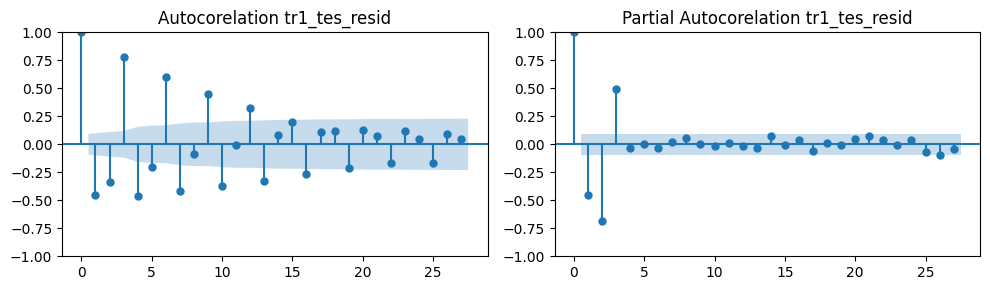

In [71]:
# –ø—Ä–∏–≤–µ–¥—ë–º –µ—â—ë —Ä–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∏ ACF PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ—Å–ª–µ TES
# –≤–∏–¥–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –∏—Ö —Ç–æ–ª—å–∫–æ MA –º–æ–¥–µ–ª—å—é, –ø–ª–æ—Ö–∞—è –∏–¥–µ—è
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(tr1_tes_resid, ax=ax[0],title='Autocorelation tr1_tes_resid')
plot_pacf(tr1_tes_resid, ax=ax[1],title='Partial Autocorelation tr1_tes_resid')
plt.tight_layout();

p-value : 0.0


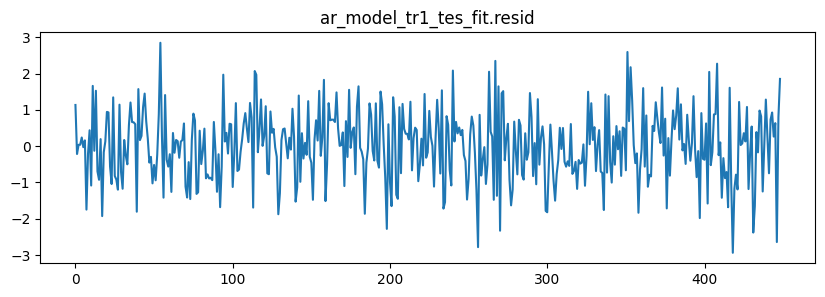

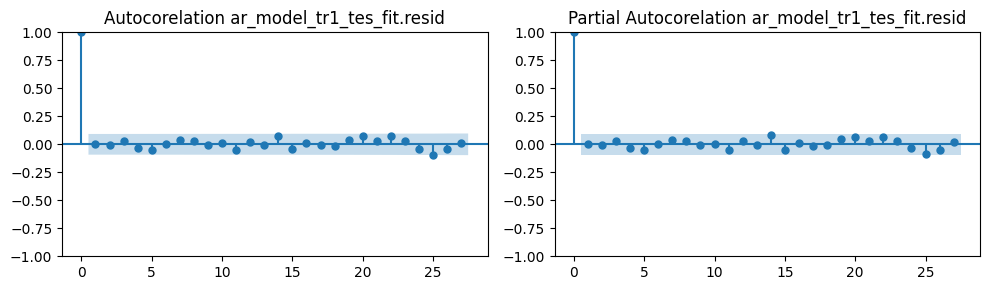

In [72]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å—Ç–∞—Ç–∫–∏ AR –º–æ–¥–µ–ª–∏
plt.figure(figsize=(10,3))
plt.title('ar_model_tr1_tes_fit.resid')
plt.plot(ar_model_tr1_tes_fit.resid)

# –æ—Å—Ç–∞—Ç–∫–∏ —Ç–æ–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç (ACF PACF), –ø–æ–≤—ã—à–∞—Ç—å –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏ –Ω–µ –Ω—É–∂–Ω–æ
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(ar_model_tr1_tes_fit.resid, ax=ax[0],title='Autocorelation ar_model_tr1_tes_fit.resid')
plot_pacf(ar_model_tr1_tes_fit.resid, ax=ax[1],title='Partial Autocorelation ar_model_tr1_tes_fit.resid')
plt.tight_layout();

#—Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å H0 –î–∏–∫–∏ –§—É–ª–ª–µ—Ä–∞
print(f"p-value : {adfuller(ar_model_tr1_tes_fit.resid)[1]}")

p-value : 2.9154093355919673e-05


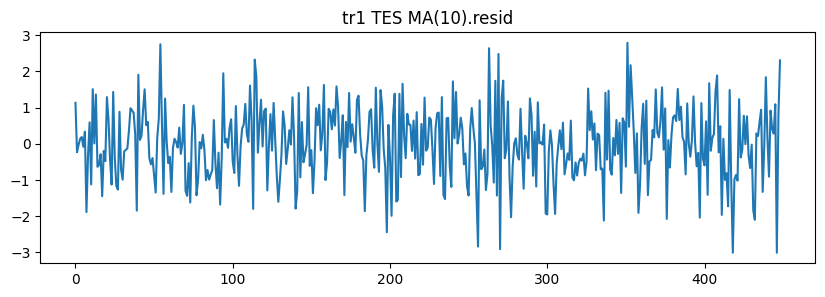

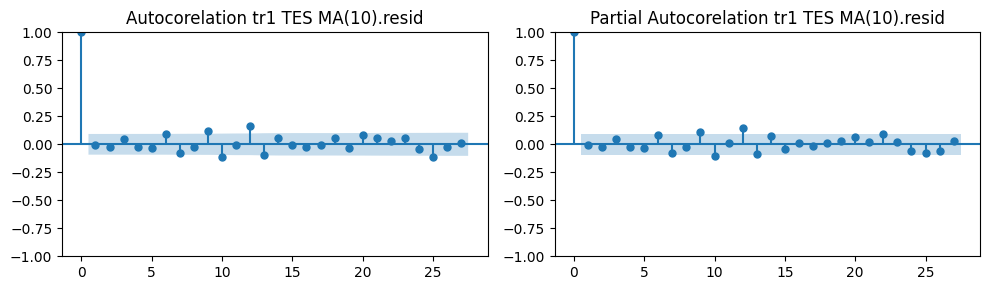

In [73]:
# —Ñ–æ—Ä–º–∞–ª—å–Ω–æ –≤ –∑–∞–¥–∞–Ω–∏–∏ –ø—Ä–æ—Å—è—Ç —á–∏—Å—Ç–æ MA –º–æ–¥–µ–ª—å
# –µ—Å–ª–∏ –∑–∞–∫—Ä—ã—Ç—å –≥–ª–∞–∑–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ—Å–ª–µ TES
# –∏ –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ —Ç–æ–ª—å–∫–æ –Ω–∞ ACF (–∏–≥–Ω–æ—Ä–∏—Ä—É—è —á—Ç–æ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ –ø–ª–∞–≤–Ω–æ–µ) 
# (—Ç–∏–ø–∞ PACF –º—ã –Ω–µ –≤–∏–¥–µ–ª–∏ –∏ –¥—É–º–∞–µ–º —á—Ç–æ –æ–Ω –∑–∞—Ç—É—Ö–∞–µ—Ç –µ—â—ë –º–µ–¥–ª–µ–Ω–µ–π ACF)
# —Ç–æ–≥–¥–∞ –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å MA(16) MA(13)
# —ç—Ç–æ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∏–π –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏, –∏–∑–ª–∏—à–Ω–µ —Å–ª–æ–∂–Ω–∞—è –º–æ–¥–µ–ª—å
# –¥–æ–ø—É—Å—Ç–∏–º –≤–æ–∑—å–º—ë–º –ú–ê(10)
ma_model_tr1_tes = ARIMA(tr1_tes_resid, order=(0,0,10))
ma_model_tr1_tes_fit = ma_model_tr1_tes.fit() # Fit the model

# –æ—Å—Ç–∞—Ç–∫–∏ MA(10) - –≤–∏–∑—É–∞–ª—å–Ω–æ –≤—ã–≥–ª—è–¥—è—Ç –Ω–µ —Ö—É–∂–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ—Å–ª–µ AR(3)
plt.figure(figsize=(10,3))
plt.title('tr1 TES MA(10).resid')
plt.plot(ma_model_tr1_tes_fit.resid)

# ACF PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ MA(10) - –ø–æ—Ö—É–∂–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ ACF PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ AR(3)
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(ma_model_tr1_tes_fit.resid, ax=ax[0],title='Autocorelation tr1 TES MA(10).resid')
plot_pacf(ma_model_tr1_tes_fit.resid, ax=ax[1],title='Partial Autocorelation tr1 TES MA(10).resid')
plt.tight_layout();

# —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å H0 –î–∏–∫–∏ –§—É–ª–ª–µ—Ä–∞ - –∏ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–æ–≤—ã—à–µ
print(f"p-value : {adfuller(ma_model_tr1_tes_fit.resid)[1]}")

# –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Ç–æ–ª—å–∫–æ –∑–∞ —Å—á—ë—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
# —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–∂–µ—Ç –ø—Ä–æ—è–≤–∏—Ç—å —Å–µ–±—è –Ω–µ —Å –ª—É—á—à–µ–π —Å—Ç–æ—Ä–æ–Ω—ã –Ω–∞ —Ç–µ—Å—Ç–µ

**6. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ MA($q$).**

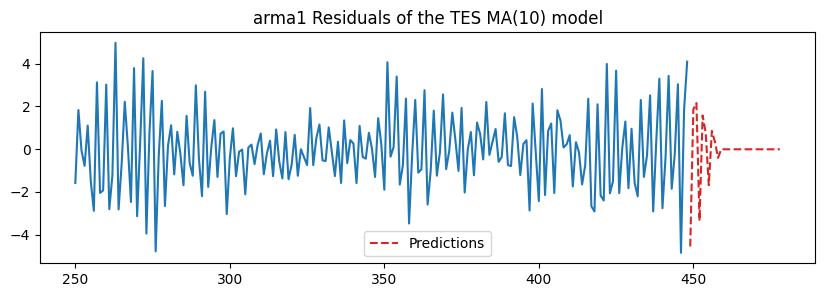

In [74]:
# –ø—Ä–æ–≥–Ω–æ–∑ TES –æ—Å—Ç–∞—Ç–∫–æ–≤ (–º–æ–¥–µ–ª—å MA(10))
resid_ma_preds_tr1_tes = ma_model_tr1_tes_fit.forecast(steps=len(te1)) # Compute predictions

plt.figure(figsize=(10,3))
plt.plot(time1[250:-len(te1)],tr1_tes_resid[250:])
plt.plot(time1[-len(te1):], resid_ma_preds_tr1_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 Residuals of the TES MA(10) model')
plt.legend()
plt.show();

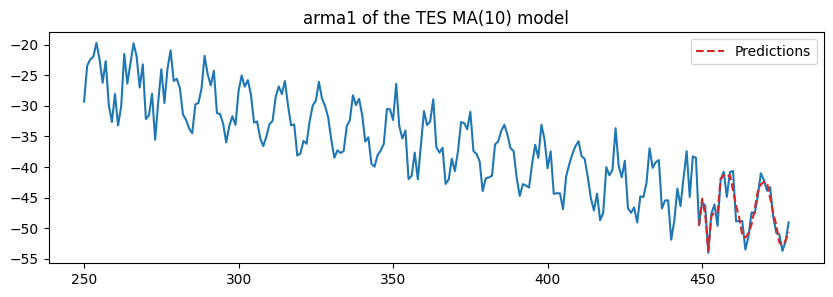

MAPE [:10]: 0.022
MAPE [10:20]: 0.032
MAPE [20:]: 0.024
MAPE: 0.026


In [75]:
# —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ MA(10)
ma_preds_tr1_tes = tr1_tes_model.forecast(len(te1)) + resid_ma_preds_tr1_tes

plt.figure(figsize=(10,3))
plt.plot(time1[250:],arma_ts1[250:])
plt.plot(time1[-len(te1):], ma_preds_tr1_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 of the TES MA(10) model')
plt.legend()
plt.show();

# MAPE - —Å—Ç—Ä–∞–Ω–Ω–æ, –Ω–æ –Ω–∞ —Ç–µ—Å—Ç–µ MA(10) –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –Ω–µ —Ö—É–∂–µ AR(3)
print(f"MAPE [:10]: {mean_absolute_percentage_error(te1[:10],ma_preds_tr1_tes[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te1[10:20],ma_preds_tr1_tes[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te1[20:],ma_preds_tr1_tes[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te1,ma_preds_tr1_tes):.3f}")

### –†—è–¥ 1 (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ) ###

**2. –°–¥–µ–ª–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.**

diff1 p-value:1.0656661577886176e-12


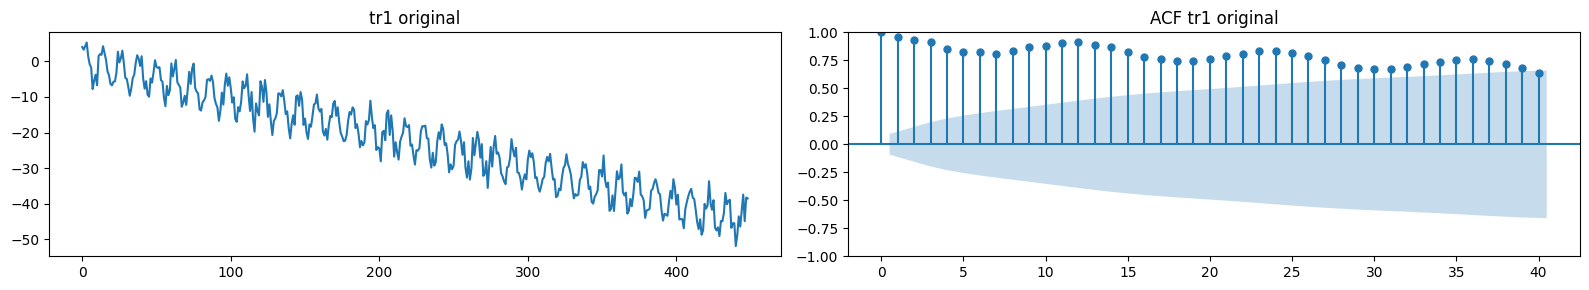

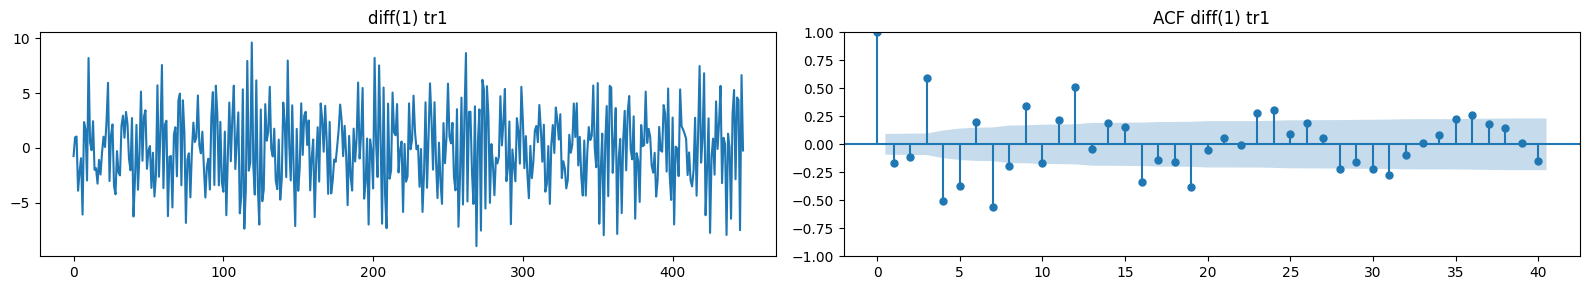

In [ ]:
_, ax = plt.subplots(1,2, figsize=(16, 3))

# –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥
ax[0].plot(tr1)
ax[0].set_title('tr1 original')
# ACF –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞ - –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –ª–∞–≥–∞—Ö –æ–∫–æ–ª–æ 12 (—Å–µ–∑–æ–Ω–Ω—ã–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç)
plot_acf(tr1,title='ACF tr1 original',ax=ax[1],lags=40)

plt.tight_layout()

# –¥–∏—Ñ—Ñ–µ—Ä–∏–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –ª–∞–≥–æ–º 1 - —É–¥–∞–ª—è–µ–º —Ç—Ä–µ–Ω–¥
# —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –æ—Å—Ç–∞–ª–∞—Å—å, 
# –Ω–æ –¥–∞–ª—å–Ω–µ–π—à–µ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ –±—É–¥–µ—Ç –∏–∑–±—ã—Ç–æ—á–Ω–æ
# ACF –≤ –ª–∞–≥–µ 1 —É–∂–µ –Ω–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ 
# (—Å–º —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –≤—ã—à–µ [–æ–±—ä—è—Å–Ω–µ–Ω–∏–µ](https://people.duke.edu/~rnau/411arim2.htm))

_, ax = plt.subplots(1,2, figsize=(16, 3))
tr1_diff1 = tr1[1:] - tr1[:-1]
ax[0].plot(tr1_diff1)
ax[0].set_title('diff(1) tr1')

plot_acf(tr1_diff1,title='ACF diff(1) tr1',ax=ax[1],lags=40)

# —Ç–µ—Å—Ç –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –Ω–µ—Ç
# –µ—Å—Ç—å —Å–µ–∑–æ–Ω–Ω–∞—è —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∞—è
print(f'diff1 p-value:{adfuller(tr1_diff1)[1]}')

plt.tight_layout()


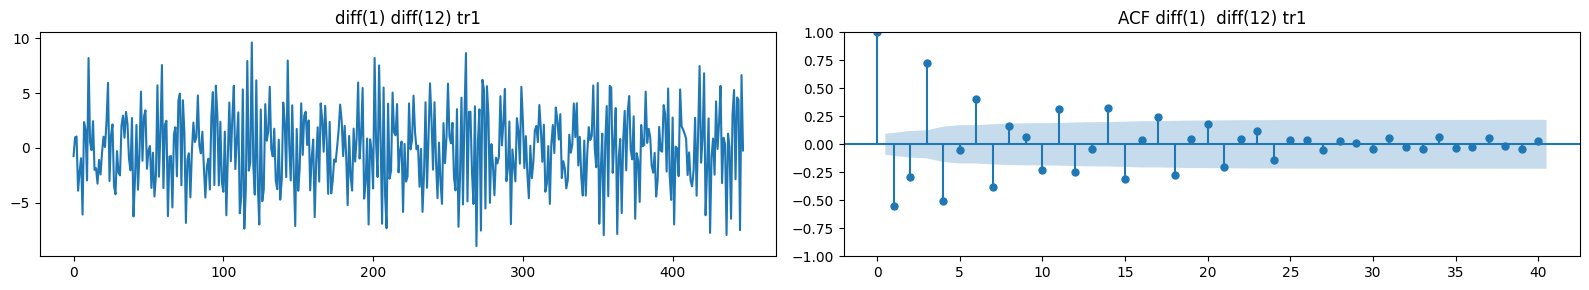

In [77]:
# –µ—Å–ª–∏ –∏–∑–±–∞–≤–∏—Ç—Å—è –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–µ–π
# –ø–æ–ª—É—á–∏–º –∏–∑–±—ã—Ç–æ—á–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–∏–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ ( ACF(–ª–∞–≥ 1) = -0.5 )
_, ax = plt.subplots(1,2, figsize=(16, 3))
tr1_diff2 = tr1_diff1[12:] - tr1_diff1[:-12]
ax[0].plot(tr1_diff1)
ax[0].set_title('diff(1) diff(12) tr1')

plot_acf(tr1_diff2,title='ACF diff(1)  diff(12) tr1',ax=ax[1],lags=40)

plt.tight_layout();

**3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $p$ –¥–ª—è AR-–º–æ–¥–µ–ª–∏.**

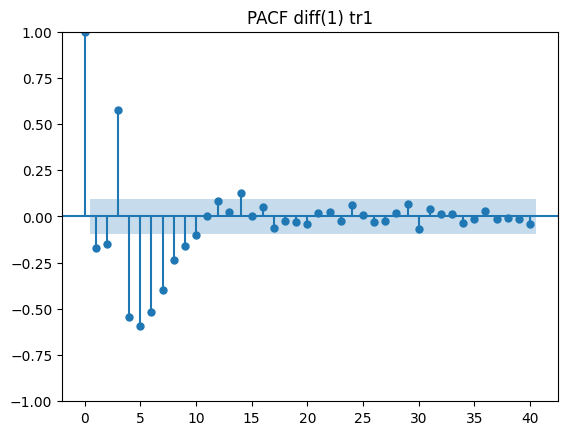

In [78]:
# –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—ã–±—Ä–æ—Å PACF –≤ –ª–∞–≥–µ 8,9
# –≤–æ–∑–º–æ–∂–Ω–æ –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å AR(8)
plot_pacf(tr1_diff1,title='PACF diff(1) tr1',lags=40);

ar_model_tr1_diff = ARIMA(tr1_diff1, order=(8,0,0))
ar_model_tr1_diff_fit = ar_model_tr1_diff.fit() # Fit the model

**4. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ AR($p$).**

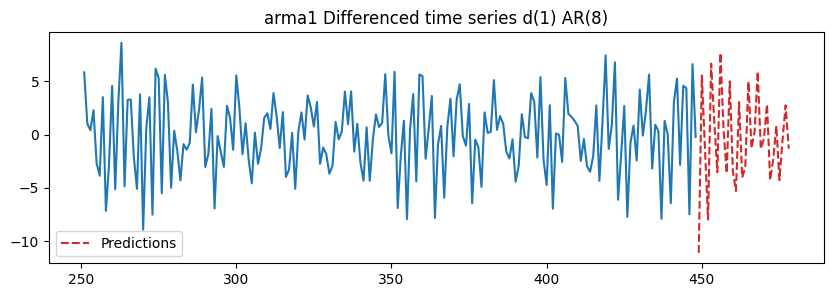

In [88]:
# Compute predictions
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ —Ä–∞–∑–Ω–æ—Å—Ç–∏
diff_ar_preds_tr1 = ar_model_tr1_diff_fit.forecast(steps=len(te1))

plt.figure(figsize=(10,3))
plt.plot(time1[250+1:-len(te1)],tr1_diff1[250:])
plt.plot(time1[-len(te1):], diff_ar_preds_tr1, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 Differenced time series d(1) AR(8)')
plt.legend()
plt.show();

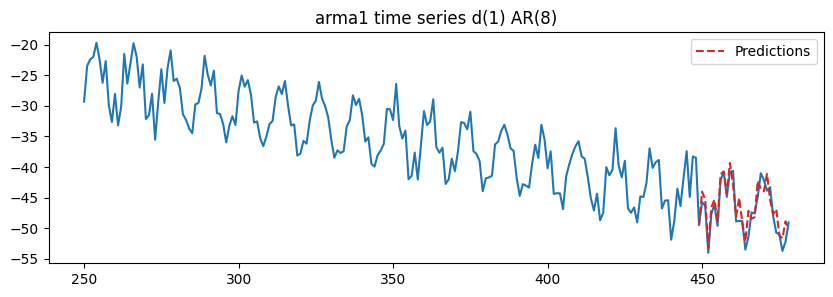

MAPE [:10]: 0.017
MAPE [10:20]: 0.039
MAPE [20:]: 0.043
MAPE: 0.033


In [91]:
# –æ–±—Ä–∞—â–∞–µ–º –æ–ø–µ—Ä–∞—Ü–∏—é –¥–∏—Ñ—Ñ–µ—Ä–∏–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
rediff1_ar_tr1 = diff_ar_preds_tr1.cumsum() + tr1[-1]
#(len(te1),len(diff_ar_preds_tr1),len(diff_ar_preds_tr1.cumsum()),np.array([1,2,3]).cumsum())

plt.figure(figsize=(10,3))
plt.plot(time1[250:],arma_ts1[250:])
plt.plot(time1[-len(te1):], rediff1_ar_tr1, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 time series d(1) AR(8)')
plt.legend()
plt.show();

# MAPE
# c diff –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø–æ—Ö—É–∂–µ, —á–µ–º –ø–æ–¥—Ö–æ–¥ —Å TES
print(f"MAPE [:10]: {mean_absolute_percentage_error(te1[:10],rediff1_ar_tr1[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te1[10:20],rediff1_ar_tr1[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te1[20:],rediff1_ar_tr1[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te1,rediff1_ar_tr1):.3f}")

**5. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $q$ –¥–ª—è MA-–º–æ–¥–µ–ª–∏.**

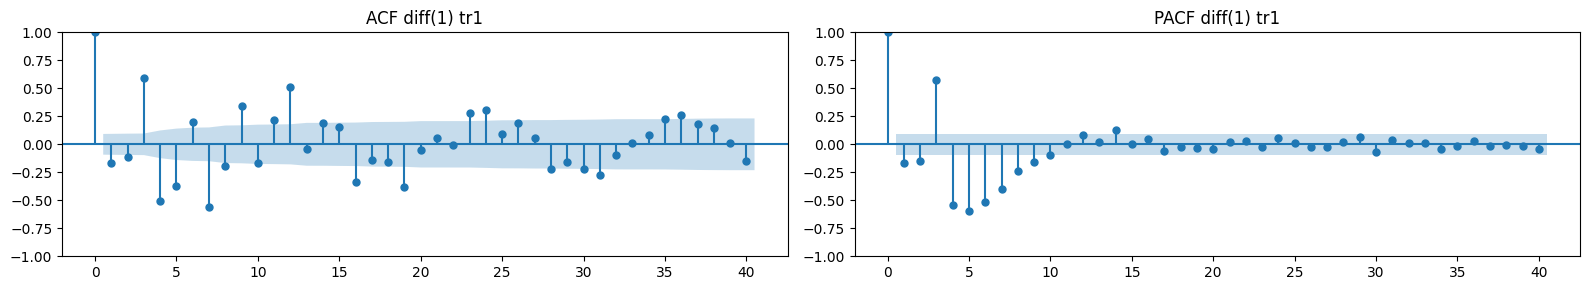

In [92]:
# –ø—Ä–∏–≤–µ–¥—ë–º –µ—â—ë —Ä–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∏ ACF PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ—Å–ª–µ diff(1) —Ä—è–¥–∞ tr1
_, ax = plt.subplots(1,2, figsize=(16, 3))
plot_acf(tr1_diff1,title='ACF diff(1) tr1',ax=ax[0],lags=40)
plot_pacf(tr1_diff1,title='PACF diff(1) tr1',ax=ax[1],lags=40)
plt.tight_layout();

In [103]:
# –ø–æ—Ä—è–¥–æ–∫ MA –º–æ–¥–µ–ª–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ ACF
# –ø–æ—Å–ª–µ–¥–Ω–∏–µ –∑–Ω–∞—á–∏–º—ã–µ –≤—ã–±—Ä–æ—Å—ã –Ω–∞ –ª–∞–≥–µ 7,9,12
# –≤–æ–∑—å–º—ë–º –º–æ–¥–µ–ª–∏ MA(7) MA(12) 
# (—Ö–æ—á—É –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –æ—Ç—Ä–∞–∑–∏—Ç—Å—è –Ω–∞ —Ç–µ—Å—Ç–µ)
ma7_model_tr1_diff = ARIMA(tr1_diff1, order=(0,0,7))
ma7_model_tr1_diff_fit = ma7_model_tr1_diff.fit() # Fit the model

ma12_model_tr1_diff = ARIMA(tr1_diff1, order=(0,0,12))
ma12_model_tr1_diff_fit = ma12_model_tr1_diff.fit()

/Users/azot/study24/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


**6. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ MA($q$).**

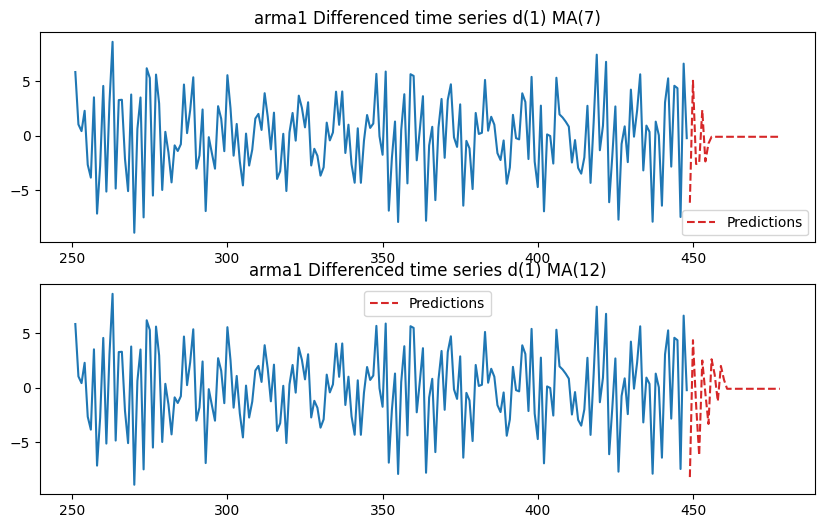

In [ ]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ —Ä–∞–∑–Ω–æ—Å—Ç–∏ d(1) ma(7), ma(12)
# –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–∞—è –º–æ–¥–µ–ª—å –∑–∞—Ç—É—Ö–∞–µ—Ç –ø–æ–∑–∂–µ
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∫–æ–ª—å–∫–æ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –æ–ø—Ä–∞–≤–∞–µ—Ç —Å–µ–±—è –Ω–∞ —Ç–µ—Å—Ç–µ
diff_ma7_preds_tr1 = ma7_model_tr1_diff_fit.forecast(steps=len(te1))
diff_ma12_preds_tr1 = ma12_model_tr1_diff_fit.forecast(steps=len(te1))

_, ax = plt.subplots(2,1, figsize=(10, 6))
ax[0].plot(time1[250+1:-len(te1)],tr1_diff1[250:])
ax[0].plot(time1[-len(te1):], diff_ma7_preds_tr1, label='Predictions', linestyle='--', color='tab:red')
ax[0].set_title('arma1 Differenced time series d(1) MA(7)')
ax[0].legend()

ax[1].plot(time1[250+1:-len(te1)],tr1_diff1[250:])
ax[1].plot(time1[-len(te1):], diff_ma12_preds_tr1, label='Predictions', linestyle='--', color='tab:red')
ax[1].set_title('arma1 Differenced time series d(1) MA(12)')
ax[1].legend()

plt.show();

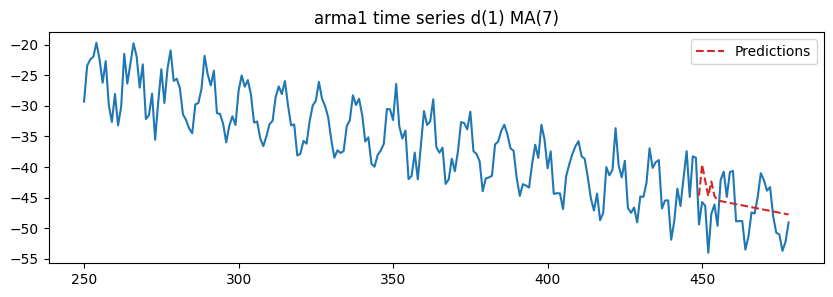

MAPE [:10]: 0.094
MAPE [10:20]: 0.073
MAPE [20:]: 0.080
MAPE: 0.082


In [105]:
# –æ–±—Ä–∞—â–∞–µ–º –æ–ø–µ—Ä–∞—Ü–∏—é –¥–∏—Ñ—Ñ–µ—Ä–∏–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
rediff1_ma7_tr1 = diff_ma7_preds_tr1.cumsum() + tr1[-1]
rediff1_ma12_tr1 = diff_ma12_preds_tr1.cumsum() + tr1[-1]

# MA(7) - –æ—Å—Ç–∞—Ç–∫–∏ –Ω–µ –±—ã–ª–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º–∏ - –ø–æ—Ç–µ—Ä—è–ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å
plt.figure(figsize=(10,3))
plt.plot(time1[250:],arma_ts1[250:])
plt.plot(time1[-len(te1):], rediff1_ma7_tr1, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 time series d(1) MA(7)')
plt.legend()
plt.show();

# MAPE
print(f"MAPE [:10]: {mean_absolute_percentage_error(te1[:10],rediff1_ma7_tr1[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te1[10:20],rediff1_ma7_tr1[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te1[20:],rediff1_ma7_tr1[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te1,rediff1_ma7_tr1):.3f}")

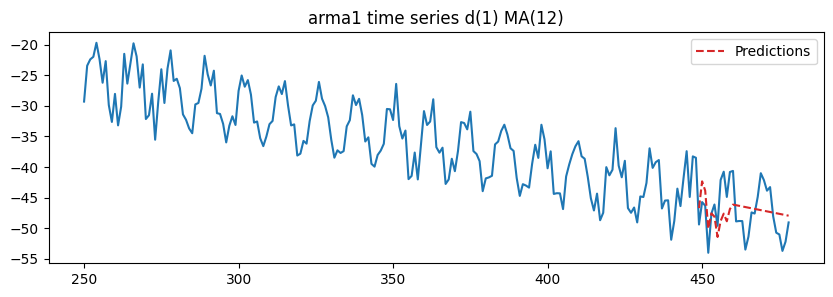

MAPE [:10]: 0.075
MAPE [10:20]: 0.074
MAPE [20:]: 0.079
MAPE: 0.076


In [106]:
# MA(12) –∑–∞ —Å—á—ë—Ç –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–æ–π –º–æ–¥–µ–ª–∏ –ø—ã—Ç–∞–ª—Å—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å
plt.figure(figsize=(10,3))
plt.plot(time1[250:],arma_ts1[250:])
plt.plot(time1[-len(te1):], rediff1_ma12_tr1, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 time series d(1) MA(12)')
plt.legend()
plt.show();

# MAPE
print(f"MAPE [:10]: {mean_absolute_percentage_error(te1[:10],rediff1_ma12_tr1[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te1[10:20],rediff1_ma12_tr1[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te1[20:],rediff1_ma12_tr1[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te1,rediff1_ma12_tr1):.3f}")

### –†—è–¥ 2 (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ TES) ###

**2. –°–¥–µ–ª–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.**

Dominant Frequency: 0.042
Dominant Period: 23.68 time units


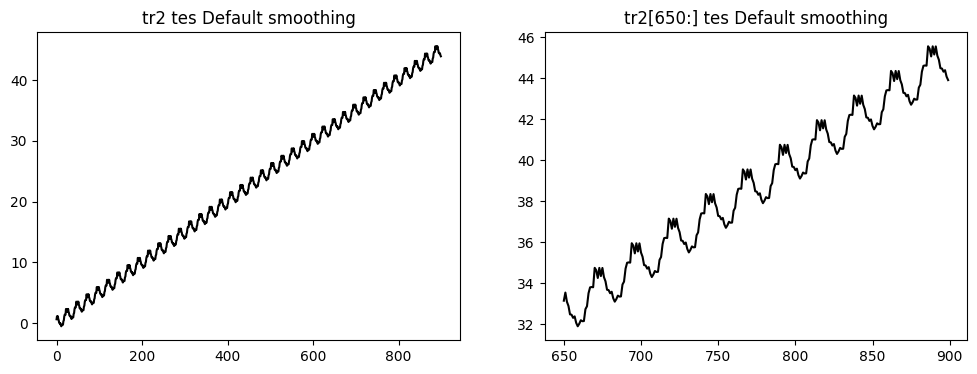

In [112]:
#–ø–µ—Ä–∏–æ–¥ - –±—ã—Å—Ç—Ä–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ
period, _, _ =fft_analysis(tr2)
period = np.round(period).astype(int)

# —Ä—è–¥ –±–æ–ª–µ–µ —à—É–º–Ω—ã–π - –Ω–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –æ–∫–∞–∑–∞–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ
# –∫–æ–≥–¥–∞ –Ω–∞ –ª–µ–∫—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ, —Ç–∞–º –±—ã–ª–æ –≤–∏–¥–Ω–æ –∫–∞–∫ –±–µ–∑ —Å–∏–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
# –Ω–µ —É–¥–∞–≤–∞–ª–æ—Å—å –ø–æ–π–º–∞—Ç—å —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (—Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π —Ä—è–¥ –Ω–µ –±—ã–ª –ø–µ—Ä–∏–æ–¥–∏—á–Ω—ã–º) 
tr2_tes_model = ExponentialSmoothing(tr2, trend='add',
                           seasonal='add', seasonal_periods=period).fit(smoothing_level=None)
tr2_tes = tr2_tes_model.fittedvalues

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(tr2_tes, 'k')
ax[0].set_title('tr2 tes Default smoothing')
ax[1].plot(time2[650:-len(te2)],tr2_tes[650:], 'k')
ax[1].set_title('tr2[650:] tes Default smoothing')

plt.show();

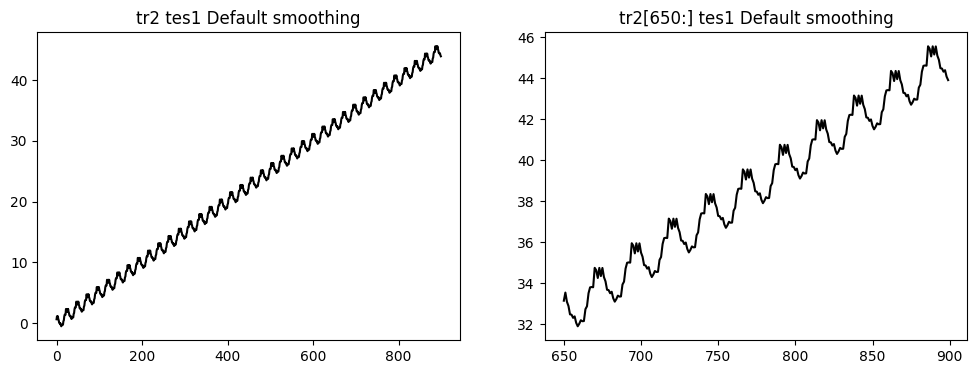

In [155]:
# —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ 0.001 
tr2_tes1_model = ExponentialSmoothing(tr2, trend='add',
                           seasonal='add', seasonal_periods=period).fit(smoothing_level=0.0001)
tr2_tes1 = tr2_tes1_model.fittedvalues

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(tr2_tes1, 'k')
ax[0].set_title('tr2 tes1 Default smoothing')
ax[1].plot(time2[650:-len(te2)],tr2_tes1[650:], 'k')
ax[1].set_title('tr2[650:] tes1 Default smoothing')

plt.show();

In [121]:
# –æ—Å—Ç–∞—Ç–∫–∏ 
tr2_tes_resid = tr2 - tr2_tes

# —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–π —Ç–µ—Å—Ç –î–∏–∫–∏ –§—É–ª–ª–µ—Ä–∞
# H0 —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π 
# —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å H0 
print(f"p-value (tr2 tes residuals): {adfuller(tr2_tes_resid)[1]}")

p-value (tr2 tes residuals): 4.0444243298566115e-20


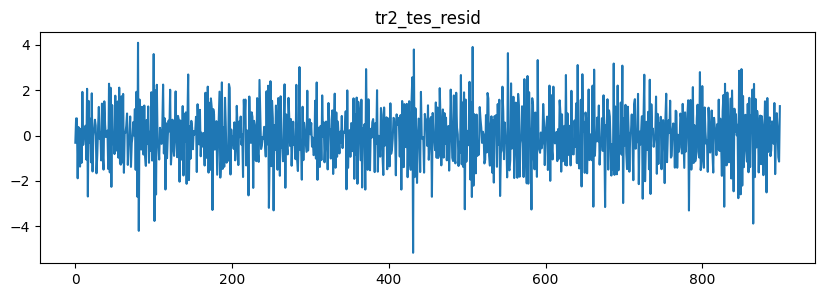

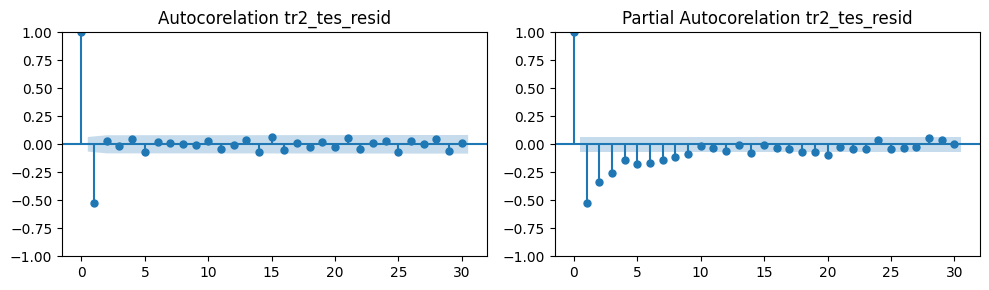

In [123]:
# –æ—Å—Ç–∞—Ç–∫–∏ –≤–∏–∑—É–∞–ª—å–Ω–æ –±–æ–ª–µ–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ä—è–¥–æ–º 1
# –¥–∏—Å–ø–µ—Ä—Å–∏—è –±–æ–ª–µ–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω–∞—è
plt.figure(figsize=(10,3))
plt.title('tr2_tes_resid')
plt.plot(tr2_tes_resid)

# —Ä–µ–∑–∫–æ –∑–∞—Ç—É—Ö–∞—é—â–∞—è ACF (–ø–æc–ª–µ –Ω–µ–±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –ª–∞–≥–æ–≤) –ø—Ä–∏–∑–Ω–∞–∫ MA –º–æ–¥–µ–ª–∏
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(tr2_tes_resid, ax=ax[0],title='Autocorelation tr2_tes_resid')
plot_pacf(tr2_tes_resid, ax=ax[1],title='Partial Autocorelation tr2_tes_resid')
plt.tight_layout();

**3. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $p$ –¥–ª—è AR-–º–æ–¥–µ–ª–∏.**

In [181]:
# –∑–Ω–∞—á–∏–º—ã–µ –≤—Å–ø–ª–µ—Å–∫–∏ PACF –Ω–∞ –ª–∞–≥–∞—Ö 7,8
# –ø–æ—Å—Ç—Ä–æ–∏–º AR(8)
ar_model_tr2_tes = ARIMA(tr2_tes_resid, order=(3,0,0))
ar_model_tr2_tes_fit = ar_model_tr2_tes.fit() # Fit the model

**4. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ AR($p$).**

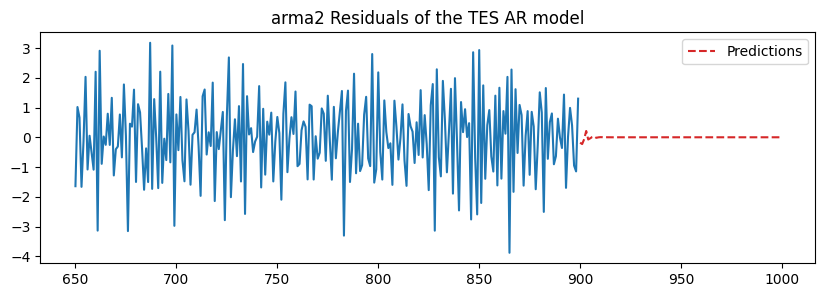

In [182]:
# –ø—Ä–æ–≥–Ω–æ–∑ TES –æ—Å—Ç–∞—Ç–∫–æ–≤ (–º–æ–¥–µ–ª—å AR(8)) - –º–æ–¥–µ–ª—å –ø–ª–æ—Ö–æ –º–æ–¥–µ–ª–∏—Ä—É–µ—Ç –æ—Å—Ç–∞—Ç–∫–∏
# –≤–∏–¥–∏–º–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ –ø—Ä–æ—Ü–µ—Å—Å —Å–ª–∏—à–∫–æ–º —à—É–º–Ω—ã–π - —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–µ–æ –ø–æ—Ö–æ–∂—å –Ω–∞ MA –ø—Ä–æ—Ü–µ—Å—Å
resid_ar_preds_tr2_tes = ar_model_tr2_tes_fit.forecast(steps=len(te2))

plt.figure(figsize=(10,3))
plt.plot(time2[650:-len(te2)],tr2_tes_resid[650:])
plt.plot(time2[-len(te2):], resid_ar_preds_tr2_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma2 Residuals of the TES AR model')
plt.legend()
plt.show();

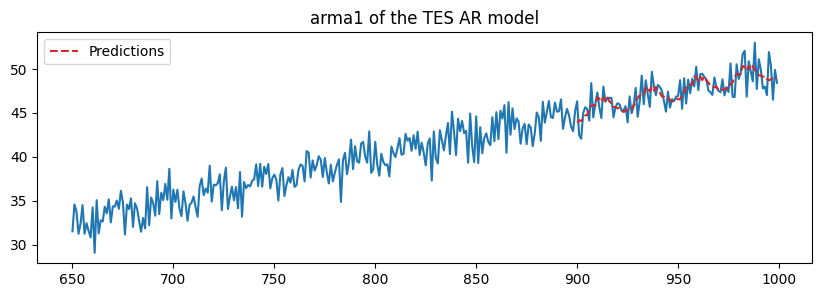

MAPE [:10]: 0.031
MAPE [10:20]: 0.015
MAPE [20:]: 0.022
MAPE: 0.022


In [144]:
# —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ - –ø–æ–π–º–∞–ª–æ —Ç–æ–ª—å–∫–æ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å + –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏
ar_preds_tr2_tes = tr2_tes_model.forecast(len(te2)) + resid_ar_preds_tr2_tes

plt.figure(figsize=(10,3))
plt.plot(time2[650:],arma_ts2[650:])
plt.plot(time2[-len(te2):], ar_preds_tr2_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma1 of the TES AR model')
plt.legend()
plt.show();

# MAPE
print(f"MAPE [:10]: {mean_absolute_percentage_error(te2[:10],ar_preds_tr2_tes[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te2[10:20],ar_preds_tr2_tes[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te2[20:],ar_preds_tr2_tes[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te2,ar_preds_tr2_tes):.3f}")

**5. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–æ—Ä—è–¥–æ–∫ $q$ –¥–ª—è MA-–º–æ–¥–µ–ª–∏.**

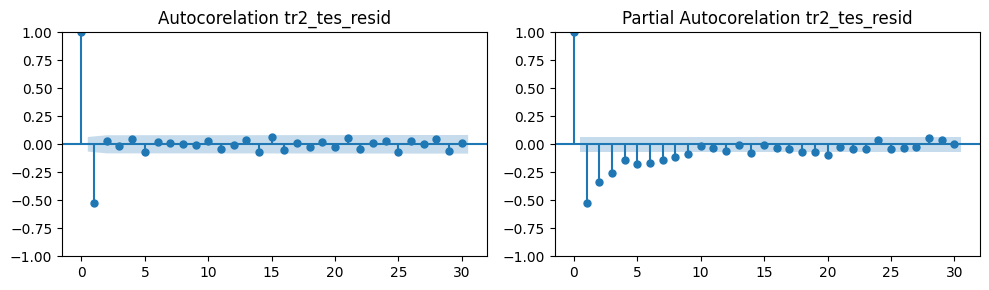

In [145]:
# –ø—Ä–∏–≤–µ–¥—ë–º –µ—â—ë —Ä–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∏ ACF PACF –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ—Å–ª–µ TES
# —Ä–µ–∑–∫–æ –∑–∞—Ç—É—Ö–∞—é—â–∞—è ACF (–ø–æc–ª–µ –Ω–µ–±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –ª–∞–≥–æ–≤) –ø—Ä–∏–∑–Ω–∞–∫ MA –º–æ–¥–µ–ª–∏
_, ax = plt.subplots(1,2, figsize=(10, 3))
plot_acf(tr2_tes_resid, ax=ax[0],title='Autocorelation tr2_tes_resid')
plot_pacf(tr2_tes_resid, ax=ax[1],title='Partial Autocorelation tr2_tes_resid')
plt.tight_layout();

In [ ]:
# MA(1) - –ø–æ—Ä—è–¥–æ–∫ –º–æ–¥–µ–ª–∏ 1, —Å–ª–∞–±–∞—è –º–æ–¥–µ–ª—å –∫–∞–∫ –æ–∫–∞–∑–∞–ª–æ—Å—å —Ç–æ–∂–µ –Ω–∏—á–µ–≥–æ —Ö–æ—Ä–æ—à–µ–≥–æ
# –æ–Ω–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å—Ä–∞–∑—É –∑–∞—Ç—É—Ö–∞–µ—Ç
# –ø—Ä–æ–±–æ–≤–∞–ª —É–≤–µ–ª–∏—á–∏—Ç—å –ø–æ—Ä—è–¥–æ–∫, –Ω–æ —Ç–∞–∫–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ –∂–µ –±—ã—Å—Ç—Ä–æ –∑–∞—Ç—É—Ö–∞–µ—Ç
ma_model_tr2_tes = ARIMA(tr2_tes_resid, order=(0,0,1))
ma_model_tr2_tes_fit = ma_model_tr2_tes.fit() # Fit the model

**6. –í—ã—á–∏—Å–ª–∏—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ MA($q$).**

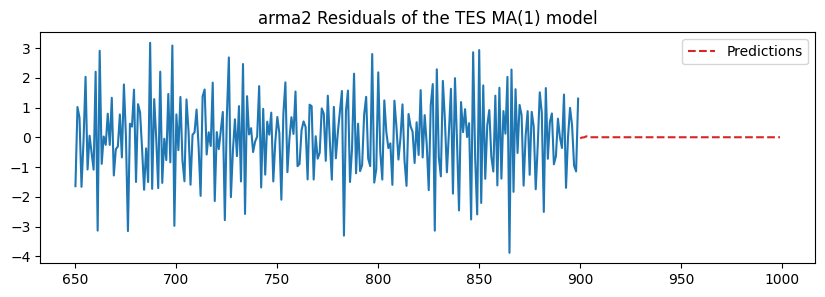

In [157]:
# –ø—Ä–æ–≥–Ω–æ–∑ TES –æ—Å—Ç–∞—Ç–∫–æ–≤ (–º–æ–¥–µ–ª—å MA(1))
# –æ—Å—Ç–∞—Ç–∫–∏ –º–≥–Ω–æ–≤–µ–Ω–Ω–æ –∑–∞—Ç—É—Ö–∞—é—Ç
resid_ma_preds_tr2_tes = ma_model_tr2_tes_fit.forecast(steps=len(te2)) # Compute predictions

plt.figure(figsize=(10,3))
plt.plot(time2[650:-len(te2)],tr2_tes_resid[650:])
plt.plot(time2[-len(te2):], resid_ma_preds_tr2_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma2 Residuals of the TES MA(1) model')
plt.legend()
plt.show();

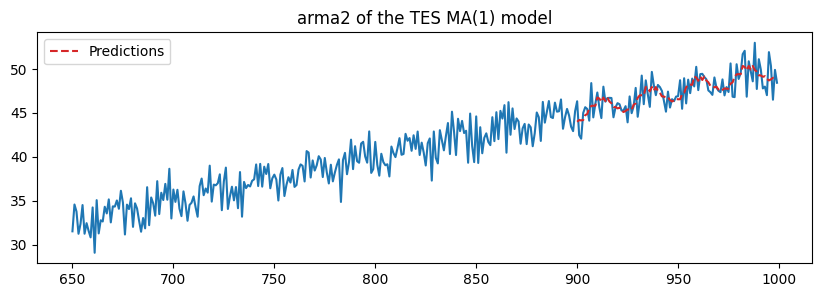

MAPE [:10]: 0.031
MAPE [10:20]: 0.015
MAPE [20:]: 0.022
MAPE: 0.022


In [160]:
# —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ MA(1)
ma_preds_tr2_tes = tr2_tes_model.forecast(len(te2)) + resid_ma_preds_tr2_tes

plt.figure(figsize=(10,3))
plt.plot(time2[650:],arma_ts2[650:])
plt.plot(time2[-len(te2):], ma_preds_tr2_tes, label='Predictions', linestyle='--', color='tab:red')
plt.title('arma2 of the TES MA(1) model')
plt.legend()
plt.show();

# MAPE
print(f"MAPE [:10]: {mean_absolute_percentage_error(te2[:10],ma_preds_tr2_tes[:10]):.3f}")
print(f"MAPE [10:20]: {mean_absolute_percentage_error(te2[10:20],ma_preds_tr2_tes[10:20]):.3f}")
print(f"MAPE [20:]: {mean_absolute_percentage_error(te2[20:],ma_preds_tr2_tes[20:]):.3f}")
print(f"MAPE: {mean_absolute_percentage_error(te2,ma_preds_tr2_tes):.3f}")

### –†—è–¥ 2 (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ) ###

**2. –°–¥–µ–ª–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.**

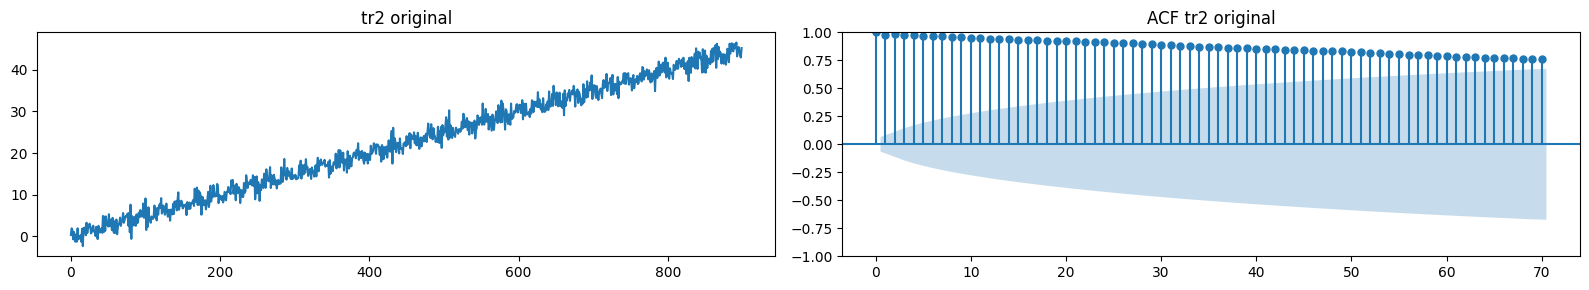

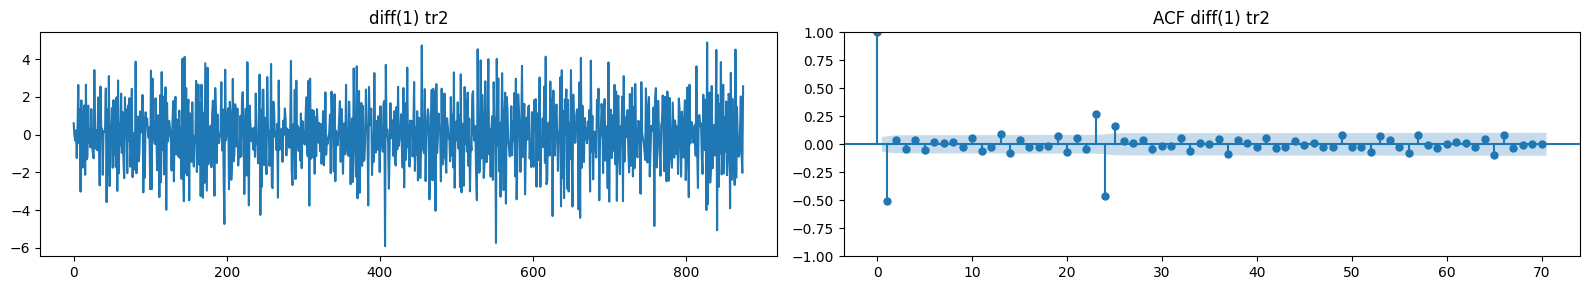

In [ ]:
_, ax = plt.subplots(1,2, figsize=(16, 3))

# –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥ (—Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å 24)
ax[0].plot(tr2)
ax[0].set_title('tr2 original')
# ACF –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞ - –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞ –ª–∞–≥–∞—Ö –æ–∫–æ–ª–æ 12 (—Å–µ–∑–æ–Ω–Ω—ã–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç)
plot_acf(tr2,title='ACF tr2 original',ax=ax[1],lags=70)

plt.tight_layout()

# –¥–∏—Ñ—Ñ–µ—Ä–∏–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –ª–∞–≥–æ–º 1 - —É–¥–∞–ª—è–µ–º —Ç—Ä–µ–Ω–¥
# –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ —É–∂–µ –∏–∑–±—ã—Ç–æ—á–Ω–æ - ACF –≤ –ª–∞–≥–µ 1 —Ä–∞–≤–Ω–æ -0.5 
# (—Å–º —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –≤—ã—à–µ [–æ–±—ä—è—Å–Ω–µ–Ω–∏–µ](https://people.duke.edu/~rnau/411arim2.htm))
# –ø—Ä–æ–±–æ–≤–∞–ª d(24), –ø—Ä–æ–±–æ–≤–∞–ª detrend + d(24) - –∏–∑–±—ã—Ç–æ—á–Ω–æ—Å—Ç—å —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è
_, ax = plt.subplots(1,2, figsize=(16, 3))
tr2_diff1 = signal.detrend(tr2) #tr2[1:] - tr2[:-1]
ax[0].plot(tr2_diff1)
ax[0].set_title('diff(1) tr2')

plot_acf(tr2_diff1,title='ACF diff(1) tr2',ax=ax[1],lags=70)
plt.tight_layout()
